# Finding the Next World-Class Soccer Players

#### Joshua Chen

<img src = "background.jpg" style="width: 300px;">
image from https://wallpaperbro.com/liverpool-players-phone

## Introduction

Ever since I was little, I've followed sports. Collecting cards, reading up on the news and watching many games as most kids do. And one thing that is constantly discussed in sports is the data, especially more so in recent years as technology and models have advanced. The prime example being the infamous Moneyball A's. But in recent years, if you read many sports articles, they always mention statistics and data. For example, the 2017 Superbowl between the Patriots and the Falcons where the Patriots came back from a .02% chance of winning (according the ESPN's win-probability graph). The models and statistics and unlikelihood of the comeback were talked about for months, especially in the highly data driven NFL, where every play can be broken down and analyzed thoroughly. The same can be said for basketball, baseball, and tennis. But one sport where this fails is soccer.

Soccer has been the "problem child" of sports data science as the game was always considered too complicated and too fluid to be analyzed. Many managers and coaches relied on instinct and feel for the game and still rely on these traits. But slowly over time, this has been changing. I'm a huge Liverpool fan and earlier in the year read an article about how Liverpool has gone from mediocre over the past few years to completely dominant with the help of their analytics department (https://www.nytimes.com/2019/05/22/magazine/soccer-data-liverpool.html). Many of Liverpool's world-class bargain signings came from their analysis of the data and statistics that people can't see. 

This is the inspiration and the idea behind this tutorial. Can a model be created to predict which players will become world-class players? In this tutorial, I'll be taking data from FIFA's assessment of players over the past 5 years and create a model to try to predict player's current level of play. I'll compare my model with FIFA's most recent assessment. I hope that this tutorial show fans that data can be used to help assess players and perhaps get the more data-driven people who aren't soccer fans to look into cracking one of the hardest sports to analyze through data.

### Set-up

To start we will be using different libraries to help us retrieve, visualize and analyze the data. To name a few, we will be using Pandas and Numpy to help process the data. Matplotlib and Seaborn will be used to visualize the data and Scikit will be used to help create our model and test our model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Getting the Data:

The first step will be to retrieve our data and to process it in a way that it can be used for our model. As stated before, in this tutorial we will be using the FIFA rating data which can be found <a href = "https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset"> here. </a>

I decided to use this data as it is a very comprehensive list of players and one of the most easily obtainable. It provides similar metrics over the last few years as FIFA hasn't changed the metrics it collects on players. Another reason is that data for soccer isn't that readily available. Most data is collected by individuals who want to mess with it and can be found via Twitter graphs or is super expensive and professional (<a href = "https://www.optasports.com/">Opta</a> being on of the only distributors). Thus, I settled for the best I could do which is this FIFA data.

### Data Wrangling

The following pieces of data are stored in the Github repository which can be found here.

In [2]:
fifa15 = pd.read_csv("players_15.csv")
fifa16 = pd.read_csv("players_16.csv")
fifa17 = pd.read_csv("players_17.csv")
fifa18 = pd.read_csv("players_18.csv")
fifa19 = pd.read_csv("players_19.csv")

fifa15.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/15...   
3      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4     167495  https://sofifa.com/player/167495/manuel-neuer/...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   27  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   29  1985-02-05   
2          A. Robben                         Arjen Robben   30  1984-01-23   
3     Z. Ibrahimović                   Zlatan Ibrahimović   32  1981-10-03   
4           M. Neuer                         Manuel Neuer   28  1986-03-27   

   height_cm  weight_kg  nationality                 club  ...   lwb   ldm  \
0        169         67    Argentina         FC Barcelona  ...  62+3  62+3   
1        185         80     Portugal          Real Madrid  ...  63+3  63+3   
2        180         80  Netherlands    FC Bayern München  ...  64+3  64+3   
3        195         95       Sweden  Paris Saint-Germain  ...  61+3  65+3   
4        193         92      Germany    FC Bayern München  ...   NaN   NaN   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  62+3  62+3  62+3  54+3  45+3  45+3  45+3  54+3  
1  63+3  63+3  63+3  57+3  52+3  52+3  52+3  57+3  
2  64+3  64+3  64+3  55+3  46+3  46+3  46+3  55+3  
3  65+3  65+3  61+3  56+3  55+3  55+3  55+3  56+3  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 104 columns]

Above we have an example of the data from 2015 (all the data from the datasets we want are uniform, so not too much to worry about there). It can be seen that there is a lot of information, most of it is data that we don't need. The most important data is the name of the player, their age, club, overall rating, and rating for each skill.

The following code filters that information and then further makes sure to remove the changes that have occurred. For example, if a player started with an 80 in passing but improved over the course of that year/season, FIFA would update their ranking by adding +1. So the data reflects this by stating that their passing rating is 80+1. This isn't convenient for our data, so the following code helps make 80+1 simply 81.

In [3]:
filterpoint = ["short_name","age","club","overall","player_positions","attacking_crossing",
                         "attacking_finishing","attacking_heading_accuracy","attacking_short_passing",
                         "attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy",
                         "skill_long_passing","skill_ball_control","movement_acceleration","movement_sprint_speed",
                         "movement_agility","movement_reactions","movement_balance","power_shot_power",
                         "power_jumping","power_stamina","power_strength","power_long_shots","mentality_aggression",
                         "mentality_interceptions","mentality_positioning","mentality_vision","mentality_penalties",
                         "mentality_composure","defending_marking","defending_standing_tackle",
                         "defending_sliding_tackle","goalkeeping_diving","goalkeeping_handling","goalkeeping_kicking"
                         ,"goalkeeping_positioning","goalkeeping_reflexes","sofifa_id"]
fifa15 = fifa15.filter(filterpoint)
fifa16 = fifa16.filter(filterpoint)
fifa17 = fifa17.filter(filterpoint)
fifa18 = fifa18.filter(filterpoint)
fifa19 = fifa19.filter(filterpoint)

def filtering(df):
    for i, rows in df.iterrows():
        if len(rows[4]) > 3:
            df.at[i,df.columns[4]] = rows[4][0:rows[4].find(",")]
        for j in range(5,len(rows)-1):
            if type(rows[j]) == str and (rows[j].find("+") != -1 or rows[j].find("-") != -1) :
                df.at[i,df.columns[j]] = str(eval(rows[j]))

filtering(fifa15)
filtering(fifa16)
filtering(fifa17)
filtering(fifa18)
filtering(fifa19)

fifa15["year"] = 2015
fifa16["year"] = 2016
fifa17["year"] = 2017
fifa18["year"] = 2018
fifa19["year"] = 2019

fifa15.head()


short_name  age                 club  overall player_positions  \
0           L. Messi   27         FC Barcelona       93               CF   
1  Cristiano Ronaldo   29          Real Madrid       92               LW   
2          A. Robben   30    FC Bayern München       90               RM   
3     Z. Ibrahimović   32  Paris Saint-Germain       90               ST   
4           M. Neuer   28    FC Bayern München       90               GK   

  attacking_crossing attacking_finishing attacking_heading_accuracy  \
0                 84                  91                         71   
1                 83                  98                         86   
2                 80                  87                         50   
3                 76                  91                         76   
4                 25                  25                         25   

  attacking_short_passing attacking_volleys  ... defending_marking  \
0                      89                80  ...                25   
1                      82                89  ...                22   
2                      88                88  ...                29   
3                      82                95  ...                25   
4                      42                25  ...                25   

  defending_standing_tackle defending_sliding_tackle goalkeeping_diving  \
0                        21                       20                  6   
1                        31                       23                  7   
2                        28                       27                 10   
3                        33                       27                 13   
4                        25                       25                 87   

  goalkeeping_handling goalkeeping_kicking goalkeeping_positioning  \
0                   11                  15                      14   
1                   11                  15                      14   
2                    8                  11                       5   
3                   15                  10                       9   
4                   88                  92                      96   

  goalkeeping_reflexes sofifa_id  year  
0                    8    158023  2015  
1                   11     20801  2015  
2                   15      9014  2015  
3                   12     41236  2015  
4                   86    167495  2015  

[5 rows x 41 columns]

The above table is the final list of data that we want from each year's dataset. Although there are 39 different columns the data we need from each is fairly simple:
- short_name - is simply the name of the player and in this case the identifier for each player (the primary key)
- age - the player's age which will come in handy later when analyzing up and coming players
- club - the club the player plays for which can be used to identify the league and country the player plays in
- overall - the overall rating the player was given by FIFA that year. 99 being the highest and best score
- player_positions - the primary position the player plays. We'll go over these in a bit
- skills - the rest of the columns are the ratings of different soccer skills from 0-99 with 99 being the best for each player


In [4]:
fifa20 = pd.read_csv("players_20.csv")

fifa20 = (fifa20.filter(filterpoint))

filtering(fifa20)

fifa20["year"] = 2020

fifa20.head()

short_name  age                 club  overall player_positions  \
0           L. Messi   32         FC Barcelona       94               RW   
1  Cristiano Ronaldo   34             Juventus       93               ST   
2          Neymar Jr   27  Paris Saint-Germain       92               LW   
3           J. Oblak   26      Atlético Madrid       91               GK   
4          E. Hazard   28          Real Madrid       91               LW   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   
3                  13                   11                          15   
4                  81                   84                          61   

   attacking_short_passing  attacking_volleys  ...  defending_marking  \
0                       92                 88  ...                 33   
1                       83                 87  ...                 28   
2                       87                 87  ...                 27   
3                       43                 13  ...                 27   
4                       89                 83  ...                 34   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   
1                         32                        24                   7   
2                         26                        29                   9   
3                         12                        18                  87   
4                         27                        22                  11   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                    11                   15                       14   
2                     9                   15                       15   
3                    92                   78                       90   
4                    12                    6                        8   

   goalkeeping_reflexes  sofifa_id  year  
0                     8     158023  2020  
1                    11      20801  2020  
2                    11     190871  2020  
3                    89     200389  2020  
4                     8     183277  2020  

[5 rows x 41 columns]

This table is the previous processing and tidying bundled up neatly. It also displays the final table that we will be comparing to, the FIFA 20 data that is currently still being updated week by week by FIFA.

### Data Processing and Tidying

Although we've done some processing and tidying, the following processing and tidying is splitting the current data we have up so that we can create a more accurate model later with a lot less random variables to account for.

#### Standardizing the Data

With all the various skills that are listed in FIFA, it would seem impossible that any one player would be a master in all and that is correct. What FIFA actually does to assess a player's overall rating is to assess what FIFA has deemed the necessary skills for the player's position. FIFA assigns different skills to different positions and then also weighs the skills in importance to create the player's final overall rating. In order to assess the overall rating correctly between the years and to create a standard, I will be reevaluating previous years from 2015-2018 which used a different calculation for the overall rating from 2019 and 2020 with the standard used in 2019 and 2020. Many people have experimented with player values to find the exact coefficients which is more explained <a href = "https://www.fifauteam.com/player-ratings-guide-fifa-19/"> here</a>. But these are the standards that will be used.

As a few examples:
<table>
<tr>
<td><img src = "coef1.png" style="height: 300px;"/></td>        <td><img src = "coef2.png" style="height: 300px;"/></td>
</tr>
</table>

In [5]:
def SortPositions(df):
    for i, rows in df.iterrows():
        if rows["player_positions"] == "GK":
            df.at[i,df.columns[3]] = (float(rows["goalkeeping_diving"]) * .24 + float(rows["goalkeeping_handling"]) * 
                                      .22 + float(rows["goalkeeping_positioning"]) * .22 +
                                      float(rows["goalkeeping_reflexes"]) * .22 + float(rows["movement_reactions"]) 
                                      * .06 + float(rows["goalkeeping_kicking"]) * .04)
        elif rows["player_positions"] == "CB":
            df.at[i,df.columns[3]] = (float(rows["defending_marking"]) * .15 + float(rows["defending_standing_tackle"]) * .15 + 
                                      float(rows["defending_sliding_tackle"]) * .15 + 
                                      float(rows["attacking_heading_accuracy"]) * .1 + float(rows["power_strength"]) 
                                      * .1 + float(rows["mentality_aggression"]) * .08 + 
                                      float(rows["mentality_interceptions"]) * .08 + 
                                      float(rows["attacking_short_passing"]) * .05 +
                                      float(rows["movement_reactions"]) * .05 + float(rows["power_jumping"]) * .04 +
                                      float(rows["skill_ball_control"])* .05)
        elif rows["player_positions"] == "RB" or rows["player_positions"] == "LB":
            df.at[i,df.columns[3]] = (float(rows["defending_marking"]) * .10 + float(rows["defending_standing_tackle"])
                                      * .12 + float(rows["defending_sliding_tackle"]) * .13 + 
                                      float(rows["attacking_heading_accuracy"]) * .07 + float(rows["power_stamina"]) 
                                      * .08 + float(rows["mentality_aggression"]) * .05 + 
                                      float(rows["attacking_crossing"]) * .07 + float(rows["mentality_interceptions"])
                                      * .12 + float(rows["attacking_short_passing"]) * .06 + 
                                      float(rows["movement_sprint_speed"]) * .05 + float(rows["movement_reactions"]) 
                                      * .08 + float(rows["skill_ball_control"])* .07)
        elif rows["player_positions"] == "RWB" or rows["player_positions"] == "LWB":
            df.at[i,df.columns[3]] = (float(rows["defending_marking"]) * .09 + 
                                      float(rows["defending_standing_tackle"]) * .11 + 
                                      float(rows["defending_sliding_tackle"]) * .10 + float(rows["power_stamina"]) * 
                                      .08 + float(rows["attacking_crossing"]) * .10 + float(rows["skill_dribbling"]) 
                                      * .07 + float(rows["movement_agility"]) * .03 + 
                                      float(rows["mentality_interceptions"]) * .10 + 
                                      float(rows["attacking_short_passing"]) * .10 + 
                                      float(rows["movement_sprint_speed"]) * .04 + float(rows["movement_reactions"]) 
                                      * .08 + float(rows["skill_ball_control"])* .10)
        elif rows["player_positions"] == "CM":
            df.at[i,df.columns[3]] = (float(rows["skill_long_passing"]) * .13 + float(rows["power_stamina"]) * .06 + 
                                      float(rows["mentality_vision"]) * .12 + float(rows["power_long_shots"]) * .05 + 
                                      float(rows["skill_dribbling"]) * .09 + float(rows["defending_standing_tackle"]) 
                                      * .06 + float(rows["mentality_interceptions"]) * .08 + 
                                      float(rows["attacking_short_passing"]) * .15 + float(rows["movement_reactions"])
                                      * .08 + float(rows["mentality_positioning"]) * .08 + 
                                      float(rows["skill_ball_control"])* .10)
        elif rows["player_positions"] == "CDM":
            df.at[i,df.columns[3]] = (float(rows["skill_long_passing"]) * .11 + float(rows["power_stamina"]) * .06 + 
                                      float(rows["defending_marking"]) * .10 + float(rows["power_strength"]) * .06 + 
                                      float(rows["defending_standing_tackle"]) * .10 + 
                                      float(rows["mentality_interceptions"]) * .12 + 
                                      float(rows["attacking_short_passing"]) * .13 + float(rows["mentality_vision"]) 
                                      * .08 + float(rows["movement_reactions"]) * .09 + 
                                      float(rows["mentality_aggression"]) * .05 + float(rows["skill_ball_control"])* 
                                      .09)
        elif rows["player_positions"] == "CAM":
            df.at[i,df.columns[3]] = (float(rows["movement_agility"]) * .04 + float(rows["movement_acceleration"]) * 
                                      .04 + float(rows["mentality_vision"]) * .16 + float(rows["power_long_shots"]) * 
                                      .06 + float(rows["skill_dribbling"]) * .11 + float(rows["attacking_finishing"]) 
                                      * .05 + float(rows["attacking_short_passing"]) * .16 + 
                                      float(rows["power_shot_power"]) * .05 + float(rows["movement_reactions"]) * .08 
                                      + float(rows["mentality_positioning"]) * .12 + float(rows["skill_ball_control"])
                                      * .13)
        elif rows["player_positions"] == "RM" or rows["player_positions"] == "LM":
            df.at[i,df.columns[3]] = (float(rows["movement_agility"]) * .03 + float(rows["movement_acceleration"]) * 
                                      .05 + float(rows["mentality_vision"]) * .08 + float(rows["skill_long_passing"]) 
                                      * .08 + float(rows["skill_dribbling"]) * .14 + float(rows["power_stamina"]) * 
                                      .05 + float(rows["attacking_crossing"]) * .14 + 
                                      float(rows["attacking_short_passing"]) * .12 + 
                                      float(rows["movement_sprint_speed"]) * .05 + float(rows["movement_reactions"]) 
                                      * .07 + float(rows["mentality_positioning"]) * .07 + 
                                      float(rows["skill_ball_control"])* .12)
        elif rows["player_positions"] == "RW" or rows["player_positions"] == "LW":
            df.at[i,df.columns[3]] = (float(rows["power_shot_power"]) * .10 + float(rows["movement_acceleration"]) * 
                                      .04 + float(rows["mentality_vision"]) * .05 + float(rows["power_long_shots"]) * 
                                      .10 + float(rows["skill_dribbling"]) * .11 + 
                                      float(rows["attacking_heading_accuracy"]) * .05 + 
                                      float(rows["attacking_crossing"]) * .16 + 
                                      float(rows["attacking_short_passing"]) * .06 + 
                                      float(rows["movement_sprint_speed"]) * .04 + float(rows["movement_reactions"]) 
                                      * .10 + float(rows["mentality_positioning"]) * .12 + 
                                      float(rows["skill_ball_control"])* .11)
        elif rows["player_positions"] == "RF" or rows["player_positions"] == "CF" or rows["player_positions"] == "LF":
            df.at[i,df.columns[3]] = (float(rows["power_shot_power"]) * .10 + float(rows["movement_acceleration"]) * 
                                      .04 + float(rows["mentality_vision"]) * .05 + float(rows["power_long_shots"]) * 
                                      .10 + float(rows["skill_dribbling"]) * .11 + 
                                      float(rows["attacking_heading_accuracy"]) * .05 + 
                                      float(rows["attacking_finishing"]) * .12 + 
                                      float(rows["attacking_short_passing"]) * .06 + 
                                      float(rows["movement_sprint_speed"]) * .04 + float(rows["movement_reactions"]) 
                                      * .10 + float(rows["mentality_positioning"]) * .12 + 
                                      float(rows["skill_ball_control"])* .11)
        elif rows["player_positions"] == "ST":
            df.at[i,df.columns[3]] = (float(rows["power_shot_power"]) * .10 + float(rows["movement_acceleration"]) * 
                                      .05 + float(rows["attacking_volleys"]) * .05 + float(rows["power_long_shots"]) 
                                      * .05 + float(rows["skill_dribbling"]) * .08 + 
                                      float(rows["attacking_heading_accuracy"]) * .10 + 
                                      float(rows["attacking_finishing"]) * .20 + float(rows["power_strength"]) * .03 
                                      + float(rows["movement_sprint_speed"]) * .04 + float(rows["movement_reactions"]) * .10 + float(rows["mentality_positioning"]) * .12 + float(rows["skill_ball_control"])* .08)
SortPositions(fifa15)
SortPositions(fifa16)
SortPositions(fifa17)
SortPositions(fifa18)

fifa15 = fifa15.sort_values(by="overall",ascending = False)
fifa16 = fifa16.sort_values(by="overall",ascending = False)
fifa17 = fifa17.sort_values(by="overall",ascending = False)
fifa18 = fifa18.sort_values(by="overall",ascending = False)

fifa15.head()

short_name  age                     club  overall  \
1    Cristiano Ronaldo   29              Real Madrid       93   
0             L. Messi   27             FC Barcelona       89   
4             M. Neuer   28        FC Bayern München       89   
2            A. Robben   30        FC Bayern München       88   
153         A. Laporte   20  Athletic Club de Bilbao       87   

    player_positions attacking_crossing attacking_finishing  \
1                 LW                 83                  98   
0                 CF                 84                  91   
4                 GK                 25                  25   
2                 RM                 80                  87   
153               CB                 33                  27   

    attacking_heading_accuracy attacking_short_passing attacking_volleys  ...  \
1                           86                      82                89  ...   
0                           71                      89                80  ...   
4                           25                      42                25  ...   
2                           50                      88                88  ...   
153                         96                      71                32  ...   

    defending_marking defending_standing_tackle defending_sliding_tackle  \
1                  22                        31                       23   
0                  25                        21                       20   
4                  25                        25                       25   
2                  29                        28                       27   
153                87                        88                       84   

    goalkeeping_diving goalkeeping_handling goalkeeping_kicking  \
1                    7                   11                  15   
0                    6                   11                  15   
4                   87                   88                  92   
2                   10                    8                  11   
153                 10                   11                   5   

    goalkeeping_positioning goalkeeping_reflexes sofifa_id  year  
1                        14                   11     20801  2015  
0                        14                    8    158023  2015  
4                        96                   86    167495  2015  
2                         5                   15      9014  2015  
153                      14                    5    212218  2015  

[5 rows x 41 columns]

#### Splitting By Roles

In soccer there are different positions for each of the 11 players on the field. The following image does a good job in showing where on the field all the positions are (a quick guide is that L is left, C is center and R is right for positions. Then vertically you have GK as goalkeeper, B as back, M as midfielder, W as wing, and F as forward)

<img src = "positions2.jpg" style="height: 300px;">

In this second image, it shows how each position is split (basically if it ends with a B it is a defensive player, M is a midfielder and W, F or ST is an attacker). This is how we are going to be splitting each position when we do our analysis as each position has different focuses. Although each position has different skills it needs to be successful, each type of player (defensive, midfielder, attacker, and goalkeeper) have enough in common with the other similar types of players that we won't split all the players into different lists.

<img src = "positions.jpg" style="width: 500px;">

These are the new dataframes by position we will use to store the data for each of the players.

In [6]:
attackers = pd.DataFrame(columns = fifa20.columns)
midfielders = pd.DataFrame(columns = fifa20.columns)
defenders = pd.DataFrame(columns = fifa20.columns)
goalkeepers = pd.DataFrame(columns = fifa20.columns)

This is the function that given an id, it will look through all 5 years and retrieve the data from each of the five years. It will then add it to a list so that the progression of each player can be displayed. 

In [7]:
def aggregation(df, sid):
    addDict = {}
    for i in fifa20.columns:
        five = fifa15.loc[fifa15['sofifa_id'] == sid]
        six = fifa16.loc[fifa16['sofifa_id'] == sid]
        seven = fifa17.loc[fifa17['sofifa_id'] == sid]
        eight = fifa18.loc[fifa18['sofifa_id'] == sid]
        nine = fifa19.loc[fifa19['sofifa_id'] == sid]
        final = [list(five[i]),list(six[i]),list(seven[i]),list(eight[i]),list(nine[i])]
        if i == "short_name":
            addDict[i] = list((fifa19.loc[fifa19['sofifa_id'] == sid])[i])[0]
            #print(addDict[i])
        else:
            addDict[i] = final
    years = []
    years.append([2015])
    years.append([2016])
    years.append([2017])
    years.append([2018])
    years.append([2019])
    addDict["year"] = years
    for keys in addDict.keys():
        if type(addDict[keys]) == list:
            flattened = [val for sublist in addDict[keys] for val in sublist]
            addDict[keys] = flattened
    return addDict

The following code simply sorts each player into their respective positions. Since there is a lot of information. I have decided to stick with simply the top 100 players in each position as I feel that is a large enough range to get statistics and data about player's growth into becoming world-class players.

In [8]:
unique_players = list(fifa19.sort_values(by="overall", ascending=False)["sofifa_id"])

aCount = 0
mCount = 0
dCount = 0
gCount = 0

for x in range(0,5000):
    sid = unique_players[x]
    pos = fifa19.loc[fifa19['sofifa_id'] == sid]["player_positions"]
    pos = list(pos)[0]
    if (pos == "CF" or pos == "ST" or pos == "LW" or pos == "RW") and aCount < 100:
        attackers = attackers.append(fifa19.loc[fifa19['sofifa_id'] == sid],ignore_index=True)
        attackers = attackers.append(fifa18.loc[fifa18['sofifa_id'] == sid],ignore_index=True)
        attackers = attackers.append(fifa17.loc[fifa17['sofifa_id'] == sid],ignore_index=True)
        attackers = attackers.append(fifa16.loc[fifa16['sofifa_id'] == sid],ignore_index=True)
        attackers = attackers.append(fifa15.loc[fifa15['sofifa_id'] == sid],ignore_index=True)
        aCount += 1
        #print(attackers)
    elif (pos == "CAM" or pos == "CM" or pos == "CDM" or pos == "RM" or pos == "LM") and mCount < 100:
        midfielders = midfielders.append(fifa19.loc[fifa19['sofifa_id'] == sid],ignore_index=True)
        midfielders = midfielders.append(fifa18.loc[fifa18['sofifa_id'] == sid],ignore_index=True)
        midfielders = midfielders.append(fifa17.loc[fifa17['sofifa_id'] == sid],ignore_index=True)
        midfielders = midfielders.append(fifa16.loc[fifa16['sofifa_id'] == sid],ignore_index=True)
        midfielders = midfielders.append(fifa15.loc[fifa15['sofifa_id'] == sid],ignore_index=True)
        mCount += 1
    elif (pos == "LWB" or pos == "RWB" or pos == "LB" or pos == "RB" or pos == "CB") and dCount < 100:
        defenders = defenders.append(fifa19.loc[fifa19['sofifa_id'] == sid],ignore_index=True)
        defenders = defenders.append(fifa18.loc[fifa18['sofifa_id'] == sid],ignore_index=True)
        defenders = defenders.append(fifa17.loc[fifa17['sofifa_id'] == sid],ignore_index=True)
        defenders = defenders.append(fifa16.loc[fifa16['sofifa_id'] == sid],ignore_index=True)
        defenders = defenders.append(fifa15.loc[fifa15['sofifa_id'] == sid],ignore_index=True)
        dCount += 1
    elif pos == "GK" and gCount < 100:
        goalkeepers = goalkeepers.append(fifa19.loc[fifa19['sofifa_id'] == sid],ignore_index=True)
        goalkeepers = goalkeepers.append(fifa18.loc[fifa18['sofifa_id'] == sid],ignore_index=True)
        goalkeepers = goalkeepers.append(fifa17.loc[fifa17['sofifa_id'] == sid],ignore_index=True)
        goalkeepers = goalkeepers.append(fifa16.loc[fifa16['sofifa_id'] == sid],ignore_index=True)
        goalkeepers = goalkeepers.append(fifa15.loc[fifa15['sofifa_id'] == sid],ignore_index=True)
        gCount += 1

In [9]:
attackers.head()

short_name age         club overall player_positions  \
0  Cristiano Ronaldo  33     Juventus      94               ST   
1  Cristiano Ronaldo  32  Real Madrid      94               LW   
2  Cristiano Ronaldo  31  Real Madrid      95               LW   
3  Cristiano Ronaldo  30  Real Madrid      93               LW   
4  Cristiano Ronaldo  29  Real Madrid      93               LW   

  attacking_crossing attacking_finishing attacking_heading_accuracy  \
0                 84                  94                         89   
1                 86                  95                         91   
2                 86                  91                         88   
3                 81                  95                         86   
4                 83                  98                         86   

  attacking_short_passing attacking_volleys  ... defending_marking  \
0                      81                87  ...                28   
1                      83                88  ...                22   
2                      83                89  ...                22   
3                      80                87  ...                22   
4                      82                89  ...                22   

  defending_standing_tackle defending_sliding_tackle goalkeeping_diving  \
0                        31                       23                  7   
1                        31                       23                  7   
2                        31                       23                  7   
3                        31                       23                  7   
4                        31                       23                  7   

  goalkeeping_handling goalkeeping_kicking goalkeeping_positioning  \
0                   11                  15                      14   
1                   11                  15                      14   
2                   11                  15                      14   
3                   11                  15                      14   
4                   11                  15                      14   

  goalkeeping_reflexes sofifa_id  year  
0                   11     20801  2019  
1                   11     20801  2018  
2                   11     20801  2017  
3                   11     20801  2016  
4                   11     20801  2015  

[5 rows x 41 columns]

Here we can see the data of how player's have improved or gotten worse over time as well as compare different statistics over the years.

## Exploratory Data Analysis

Throughout this project, the major assumption is that some trend between world-class players exists which would allow a model to be created to predict how youngsters will develop. In order to show this, we will take a look at the visual data of the different group of attackers and see if there are any trends between improvement over time.

We will mainly use line plots and distribution plots to look at our data. The code for those two types of graph are below:

In [10]:
def alinegraph(df):
    dfline = sns.lineplot(x = "year", y = "overall", hue = "short_name", data = df)
    coord = dfline.get_position()
    dfline.set_position([coord.x0, coord.y0, coord.width * 3, coord.height * 3])
    # Moving the legend away from being placed on top of the graph
    dfline.legend(loc='center right', bbox_to_anchor=(1.2, .5))
    # Setting the title and axis
    dfline.set_title("Overall Rating Over Time")
    dfline.set(ylabel = "Overall Rating", xlabel = "Year")
    # Displaying the graph
    plt.figure()

def adistgraph(df):
    sidVals = df["sofifa_id"].unique()
    change = []
    for x in sidVals:
        beg = list(fifa15.loc[fifa15["sofifa_id"]==x]["overall"])
        end = list(fifa19.loc[fifa19["sofifa_id"]==x]["overall"])
        if len(beg) > 0 and len(end) > 0:
            oChange = int(end[0]) - int(beg[0])
            change.append(oChange)

    adist = sns.distplot(change)
    coord = adist.get_position()
    adist.set_position([coord.x0, coord.y0, coord.width * 2, coord.height * 2])
    # Setting the title and axis
    adist.set_title("Distribution of Change over 5 Years")
    adist.set(ylabel = "Frequency", xlabel = "Overall Change")
    # Displaying the graph
    plt.figure()

### Attackers Analysis

Attacking positions are one of the most interesting positions to take a look at. Outside of the elite of elites (Messi and Ronaldo for example). Attacking positions tend to be short-lived because they have to be fast and accurate, a position that battles time. In addition, attackers stats tend to go up and down based on seasons where for one season a player may be amazing, a change in teams, style, or injury can completely derail an attacker more than any other. From these basic assumptions, the graph should be relatively varied, huge changes in ratings should be seen over 5 years as attacking players tend to get really good really quickly and slowly fall away.

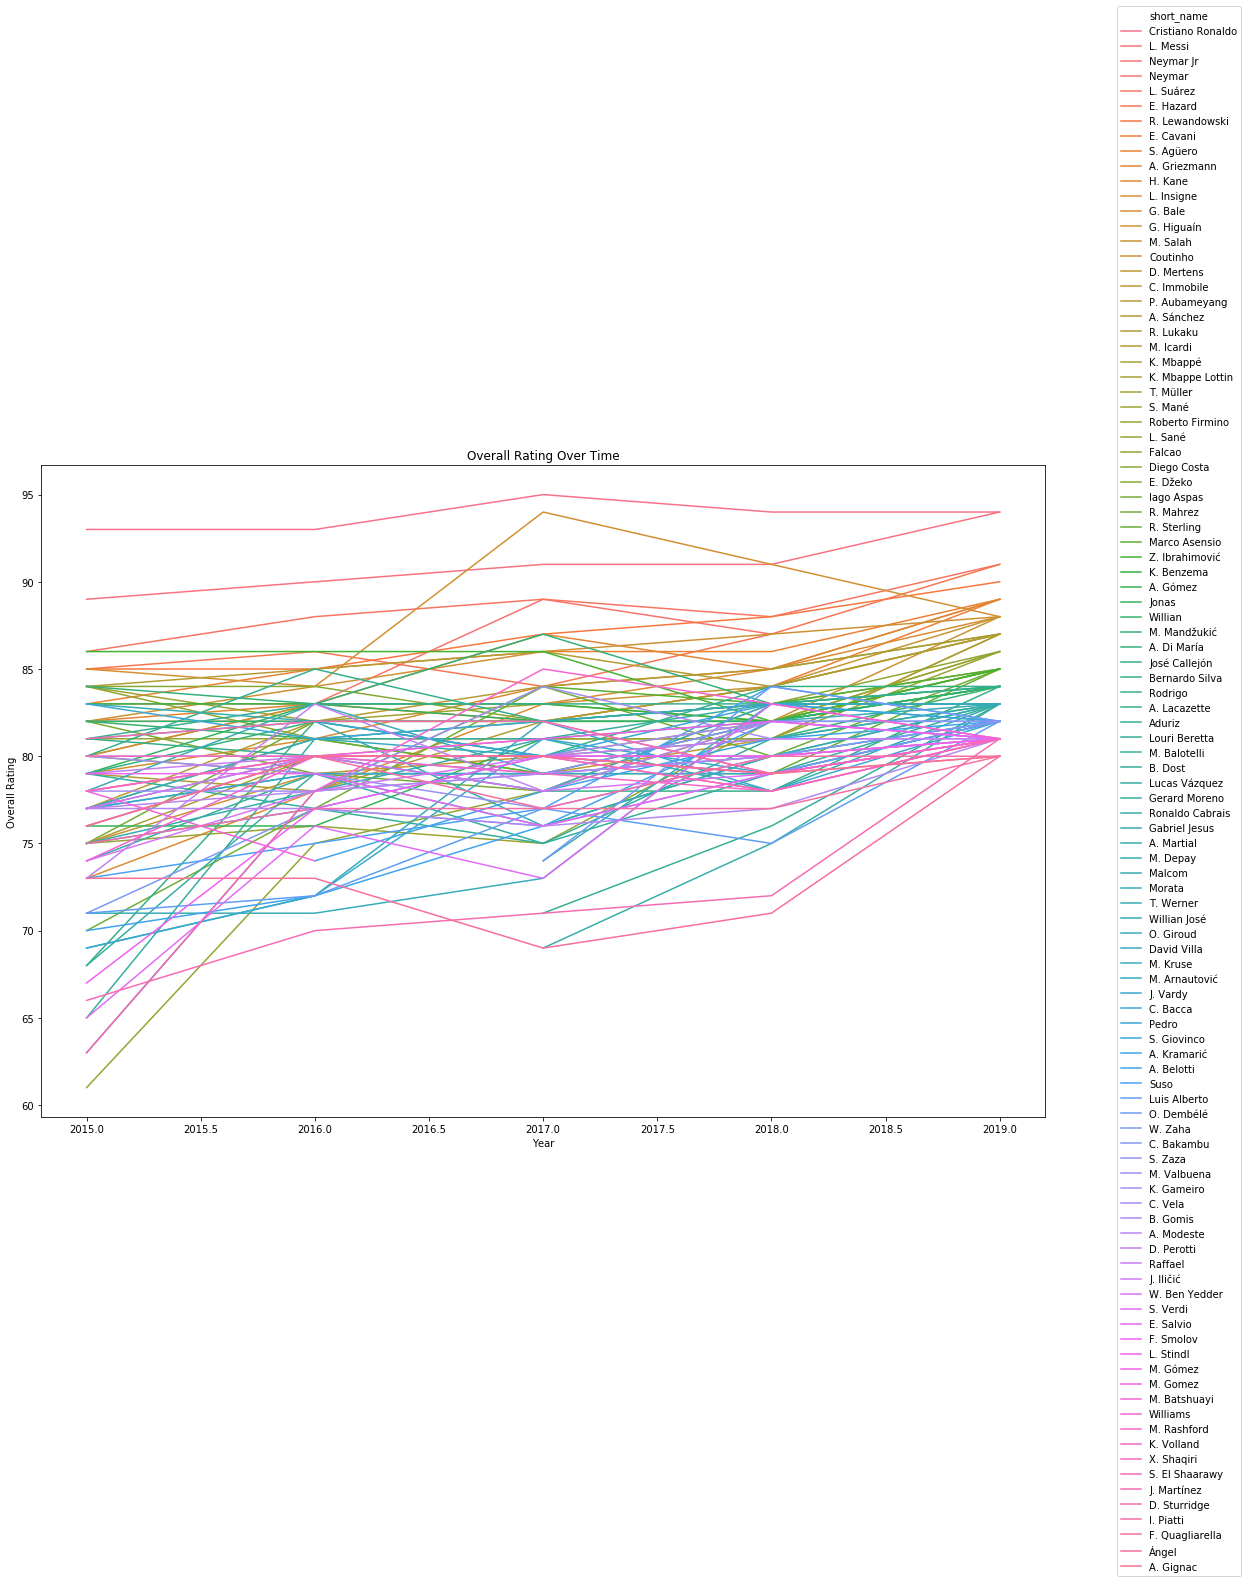

<Figure size 432x288 with 0 Axes>

In [11]:
attackers.overall = pd.to_numeric(attackers.overall)
alinegraph(attackers)

The assumption made in the beginning is relatively shown by this graph. One way to read this graph is to notice that the spectrum of colors represent the final rating. For example red is the most elite players and end at the top while green is the middle of the pack. By looking at the concentration of colors each year, we can see how much change each rating plays out. Just looking at the graph it can be seen that there are very few large increases (few to no red and orange line that are low in 2015) but most individuals do seem to increase relatively rapidly compared to what would be expected in other positions. Most lower ranked individuals in 2015 can make it to the middle of the pack in 2019, but almost none are able to make it past that point.

The following graph better shows the distribution of overall rating change over time for the attackers.

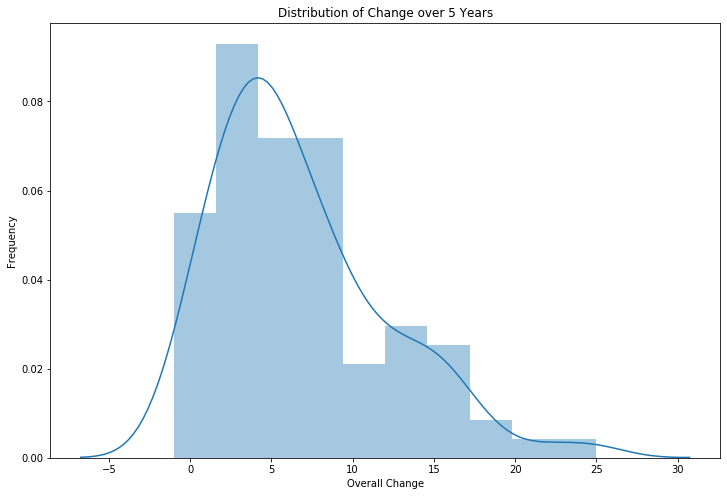

<Figure size 432x288 with 0 Axes>

In [12]:
adistgraph(attackers)

From this graph we can see overall, the level of play rises for almost 1/4th of players by at least 5. The outliers are those who increase more than 15.

But it still is hard to see, so the following graphs are the top 100 players split into groups of 20 to show better variance in whether there are large variations in overall rating as well as the distribution of change.

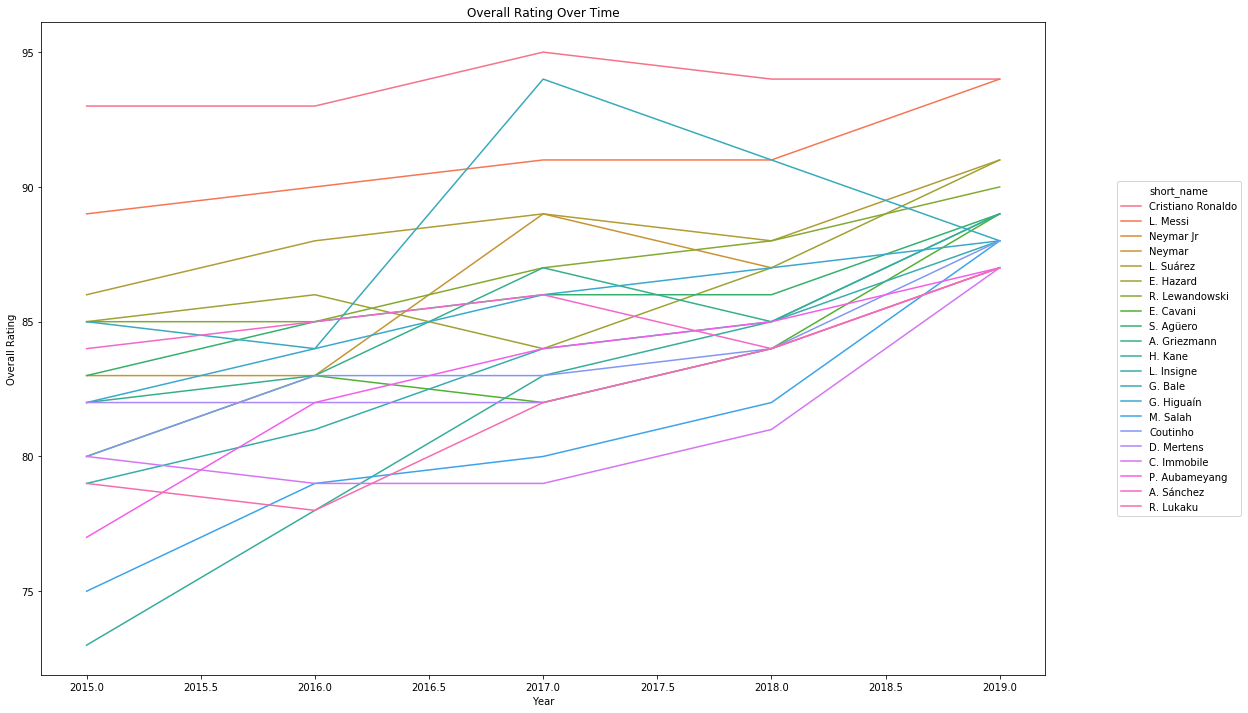

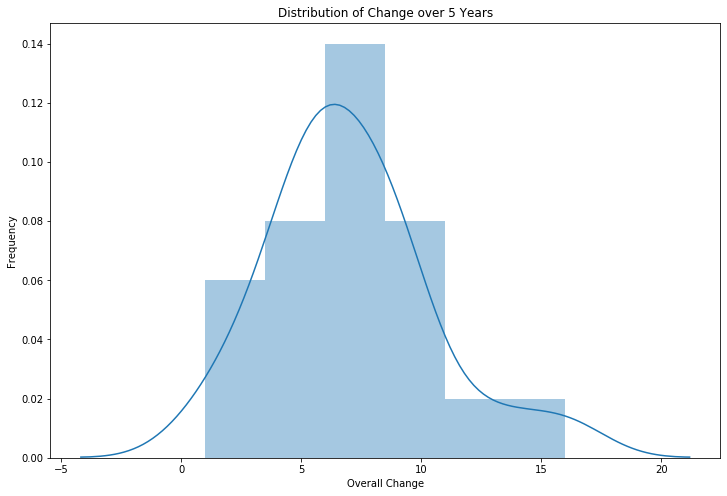

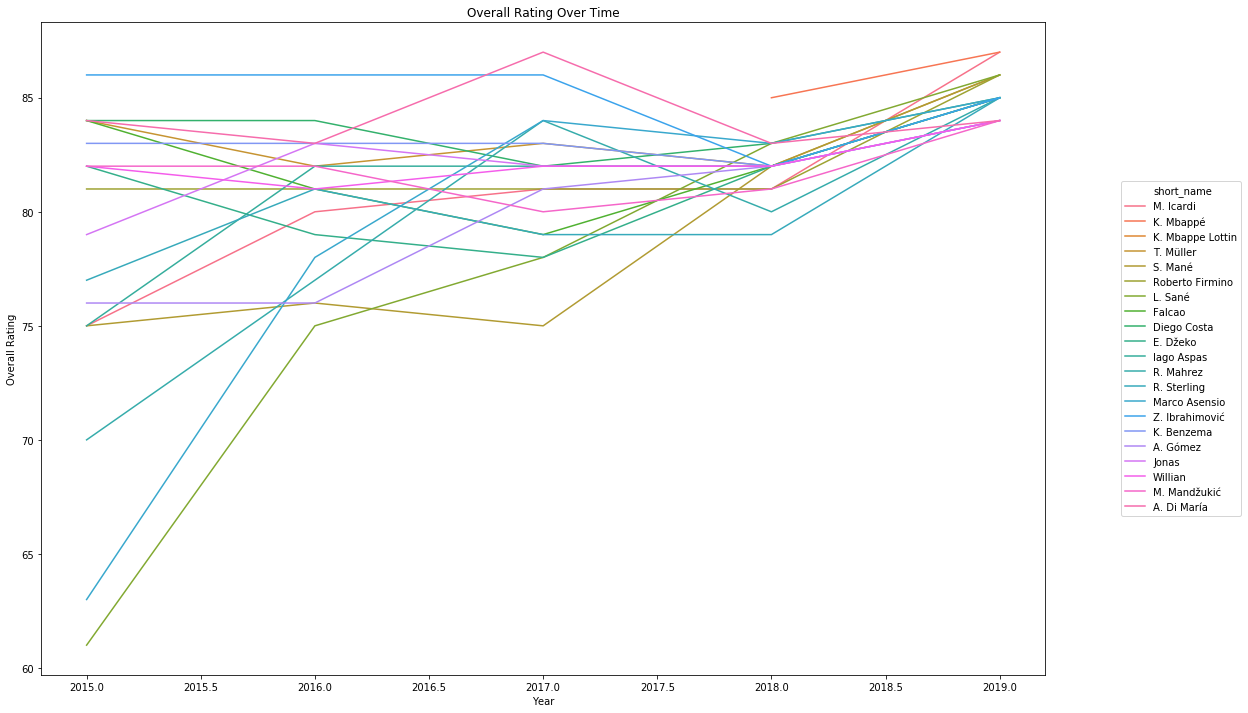

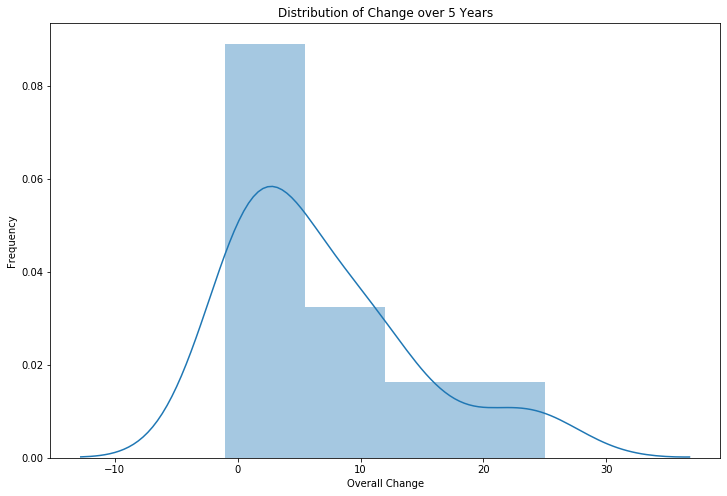

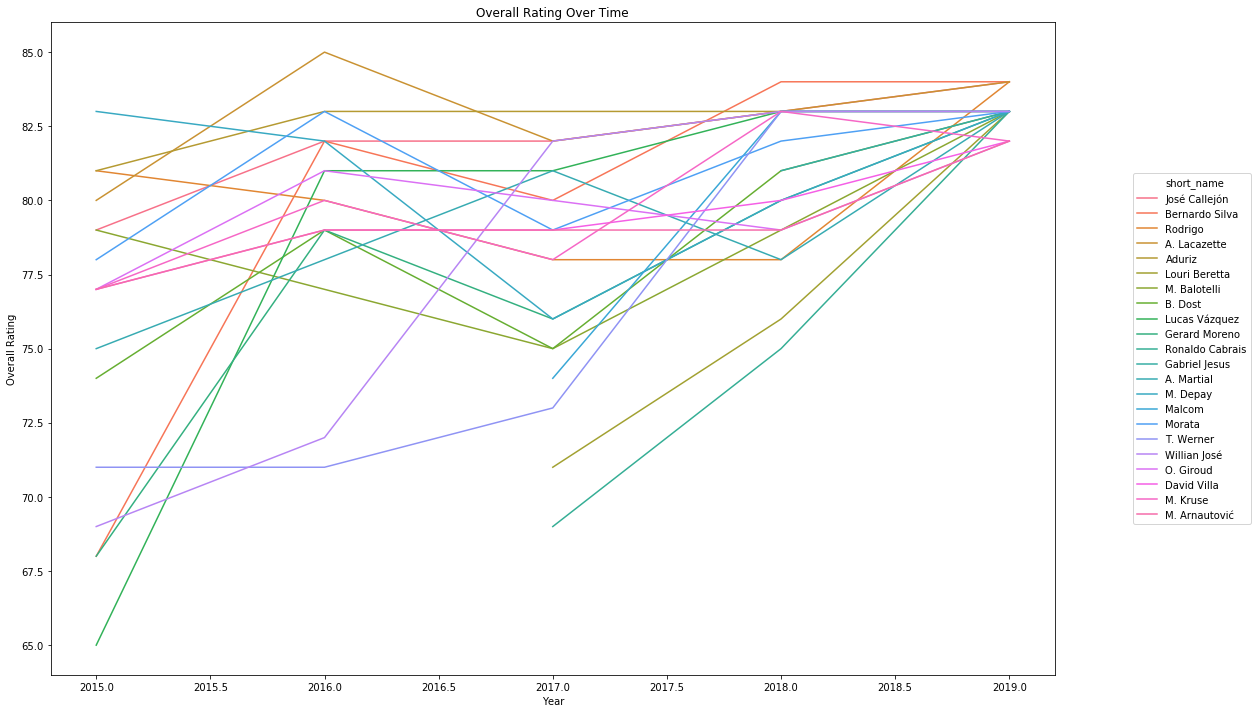

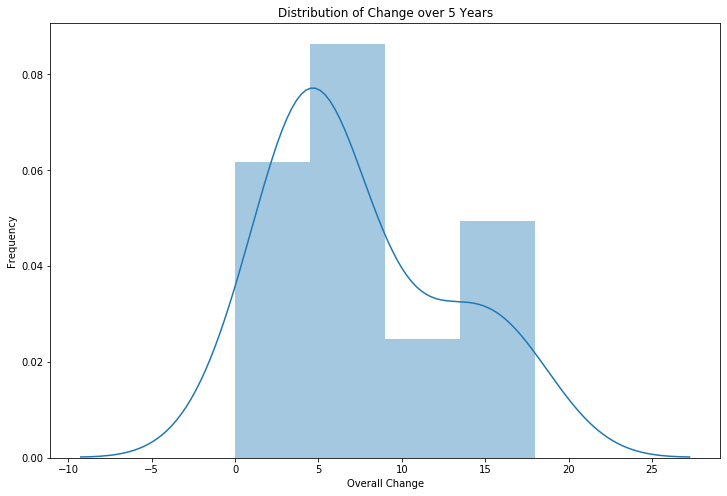

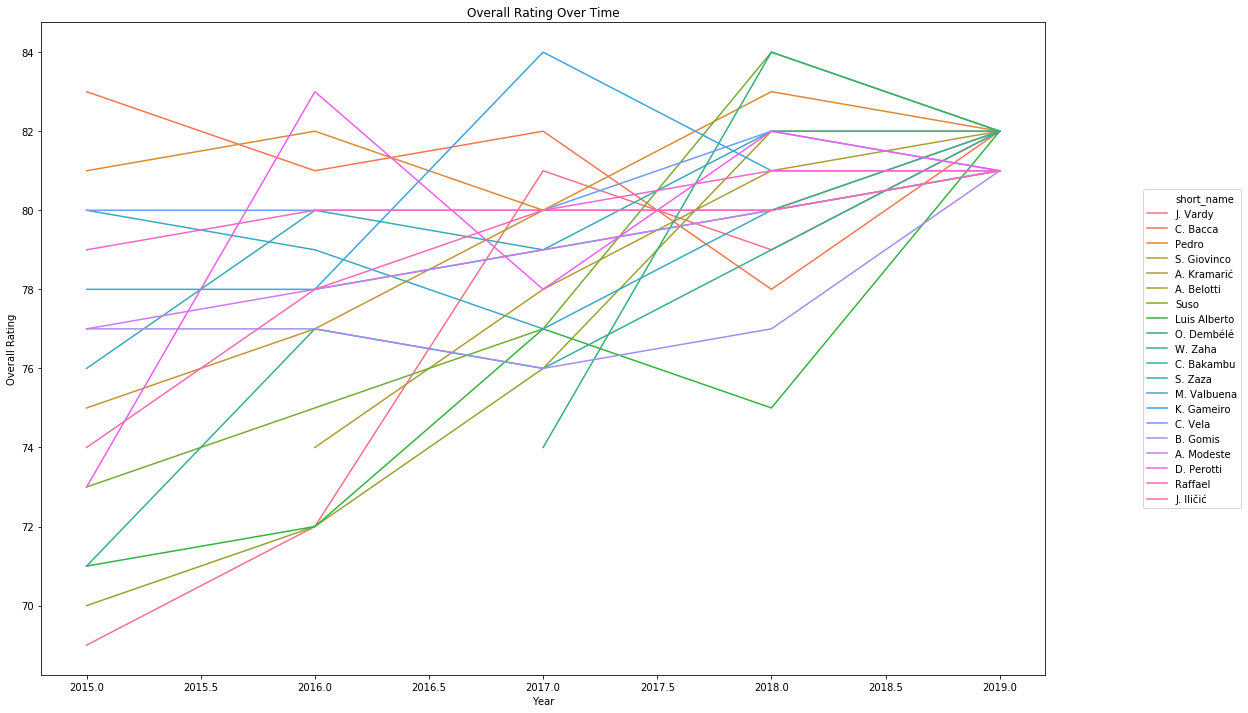

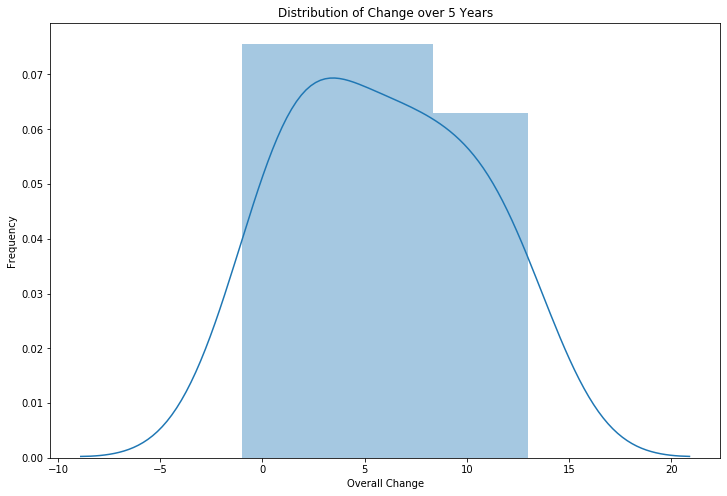

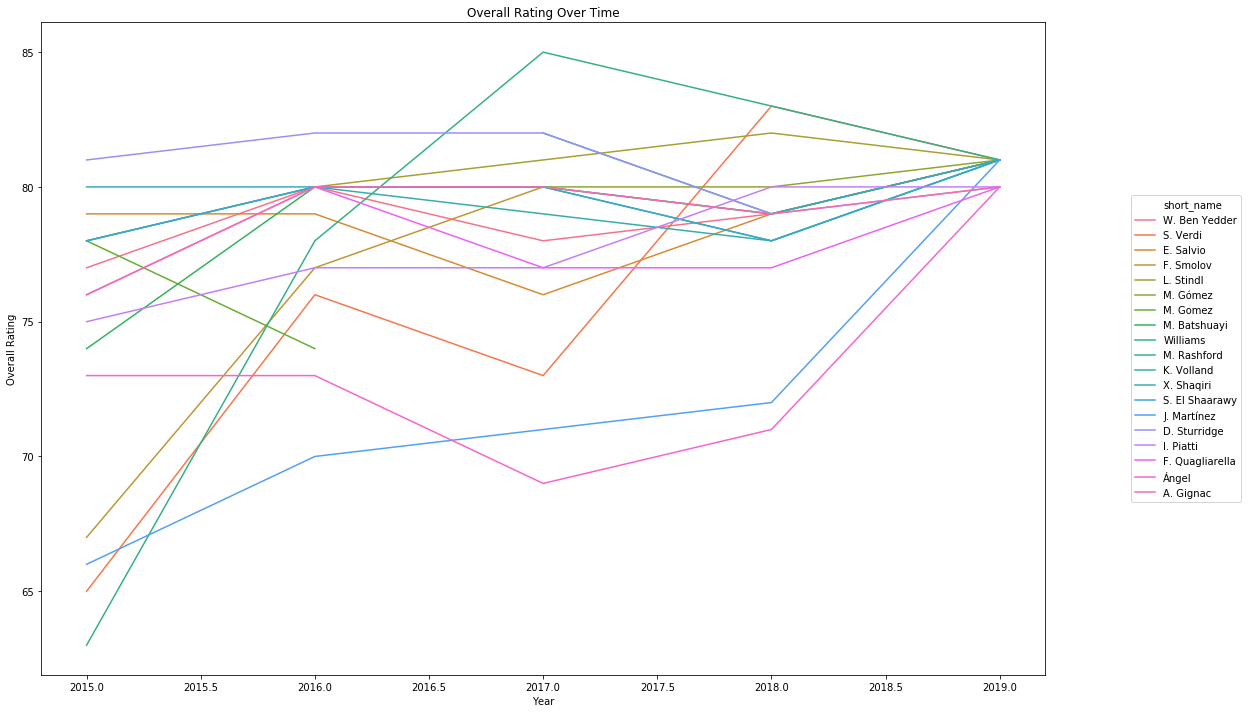

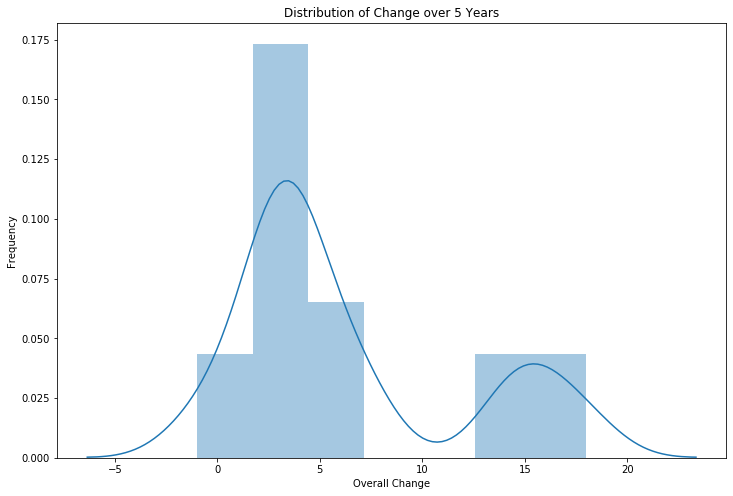

<Figure size 432x288 with 0 Axes>

In [13]:
a1 = attackers[:100]
a2 = attackers[100:198]
a3 = attackers[198:298]
a4 = attackers[298:393]
a5 = attackers[393:]

alinegraph(a1)
adistgraph(a1)
alinegraph(a2)
adistgraph(a2)
alinegraph(a3)
adistgraph(a3)
alinegraph(a4)
adistgraph(a4)
alinegraph(a5)
adistgraph(a5)


From top to bottom, is the top fifth of the top 100 attacking players to the bottom fifth. There's a lot to analyze with each of these graphs but I will simply highlight a few important points from each of the graphs. In the first set and second set (top 40% of top 100) we see that there is a lot more variance. While in the next 40%, there is a more uniform distribution. This will be important later in our model as we notice that to become the best of the best, there could possibly be large jumps while to be a world-class but not the best player, their overall rating and metrics should be similar to other players of that caliber, 5 years ago. For the bottom 20%, most were around that level 5 years prior with only 5% of those players have been very low rating players that made that jump.

### Midfielders Analysis

The midfield positions define a team. The midfield decides whether the team favors defensive or attacking tactics depending on if the midfield plays higher up the pitch or lower and defends. It is the identity of the team. Overall, this position is one that will probably see less variation in change as most midfielders share very common abilities such as being good passers, dribblers and having good vision (overall understanding of what is happening on the field at all times).

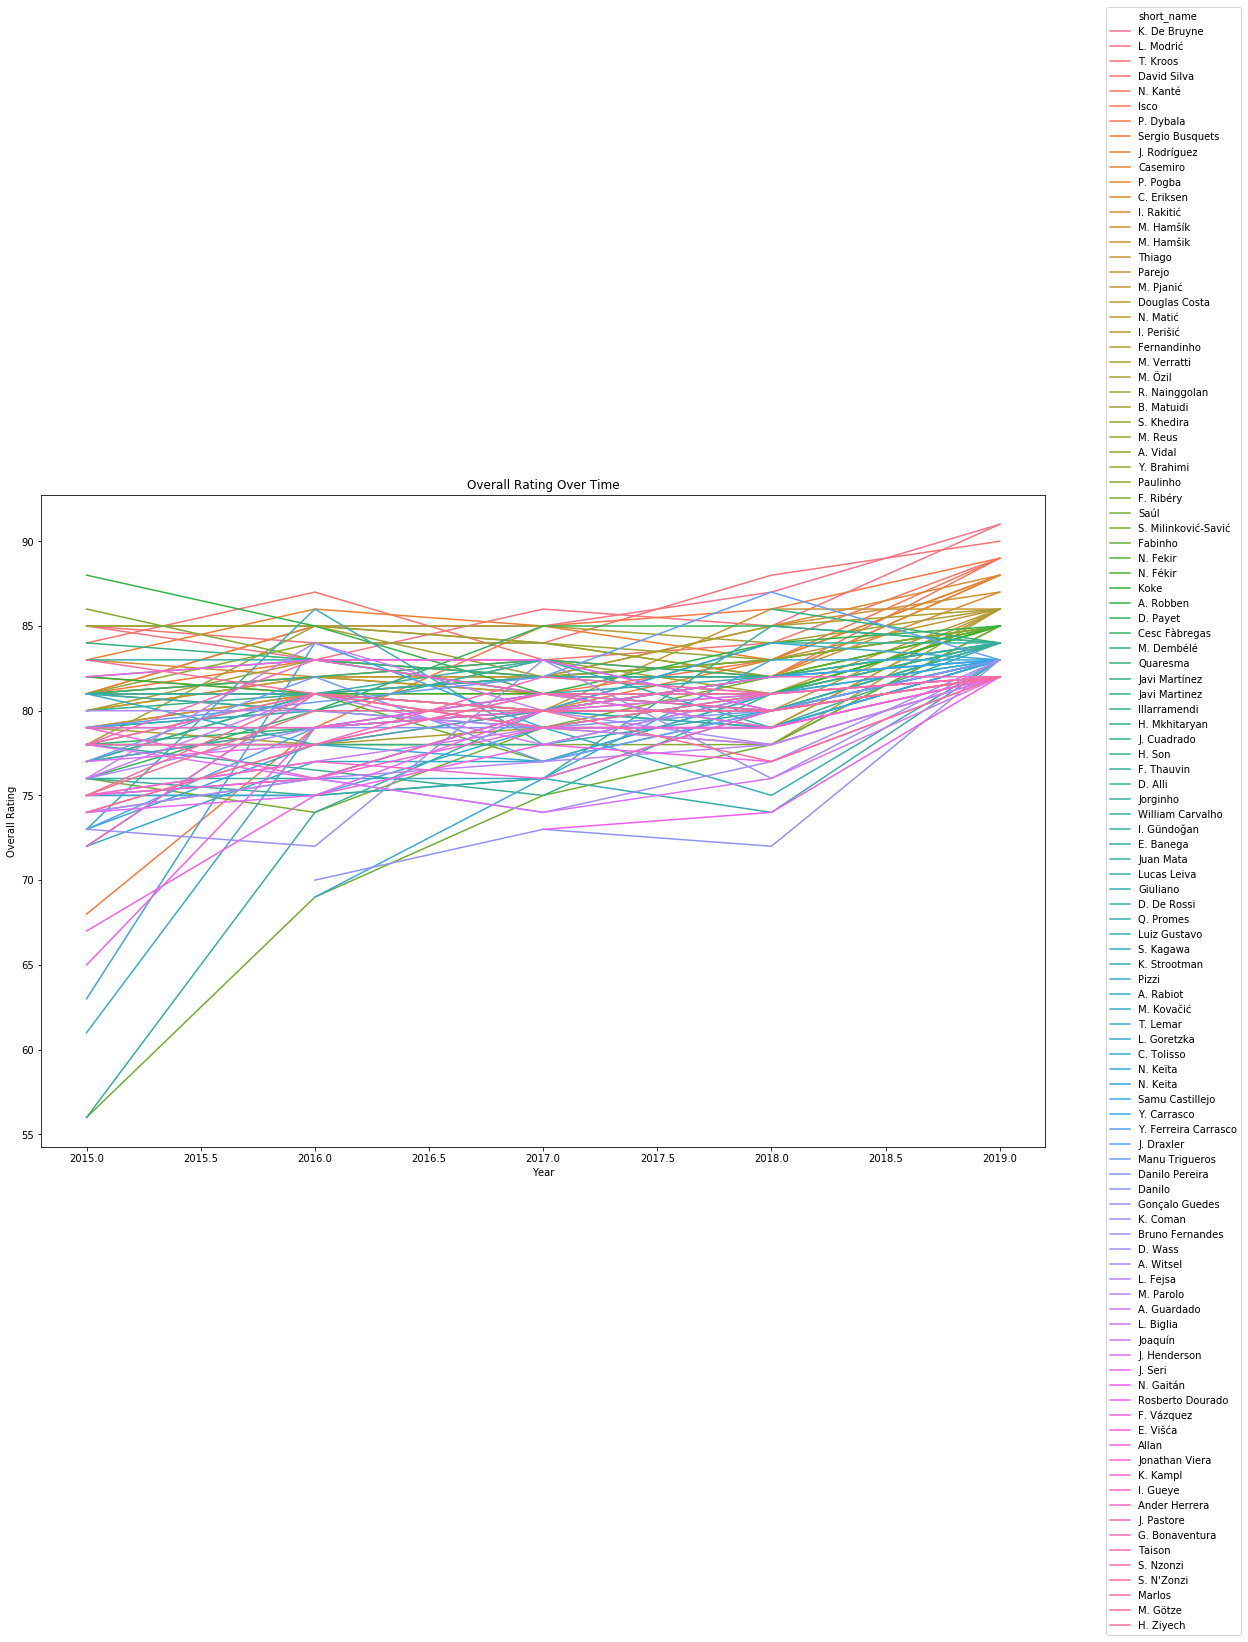

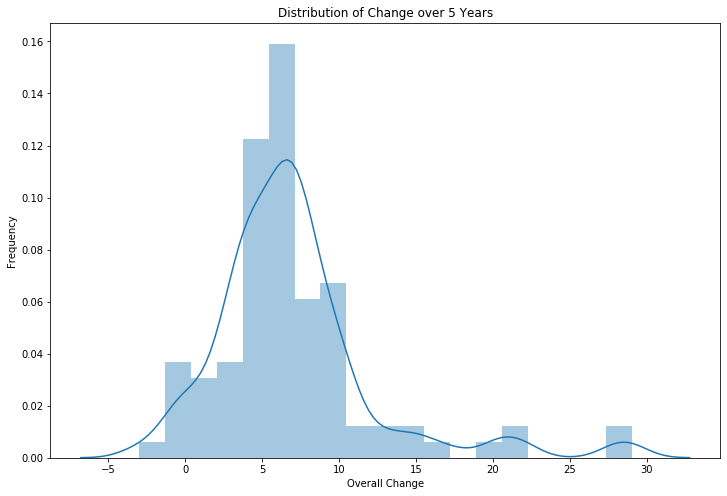

<Figure size 432x288 with 0 Axes>

In [14]:
midfielders.overall = pd.to_numeric(midfielders.overall)
alinegraph(midfielders)
adistgraph(midfielders)

As predicted, the change is very modal here around 5-7 being the average increase. This suggests that to be able to identify a world-class midfielder may be easier as they tend to all follow a similar trend. The goal then would be to identify the world-class talents that can increase 15 or more in rating (which is less than 8% according to the distribution graph).

Next is to take a look at the smaller subsets of this dataset as we did with the attackers.

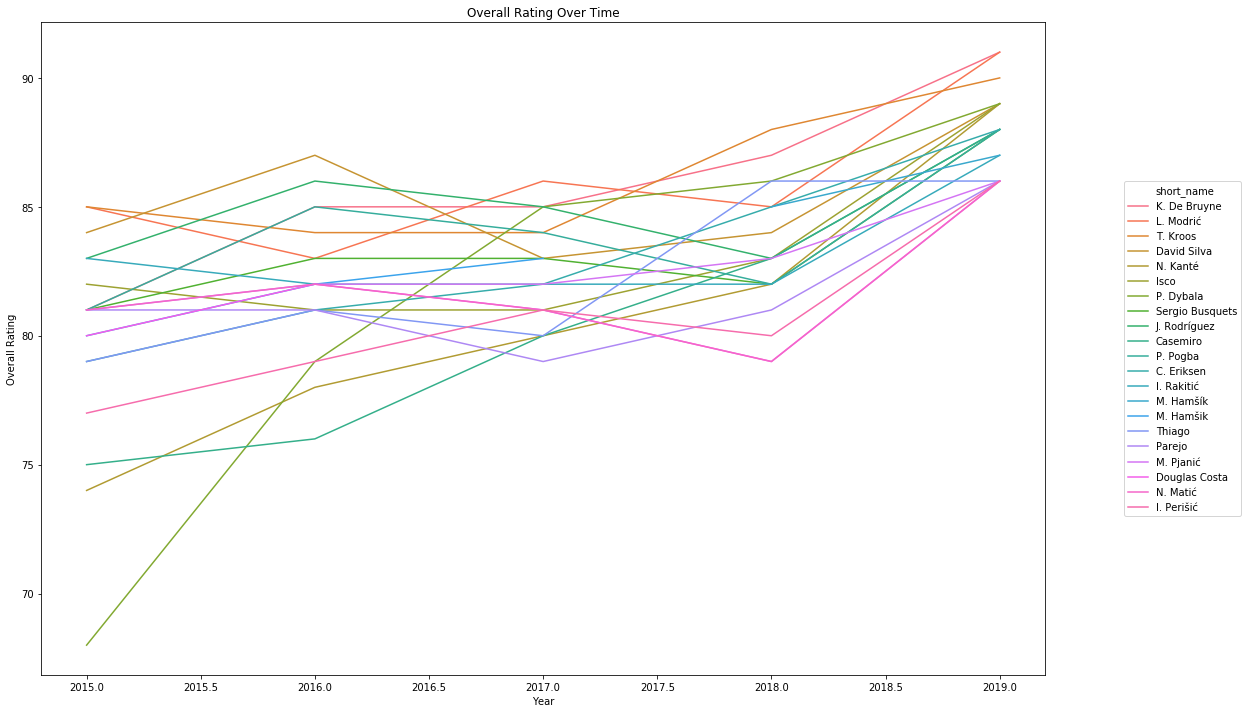

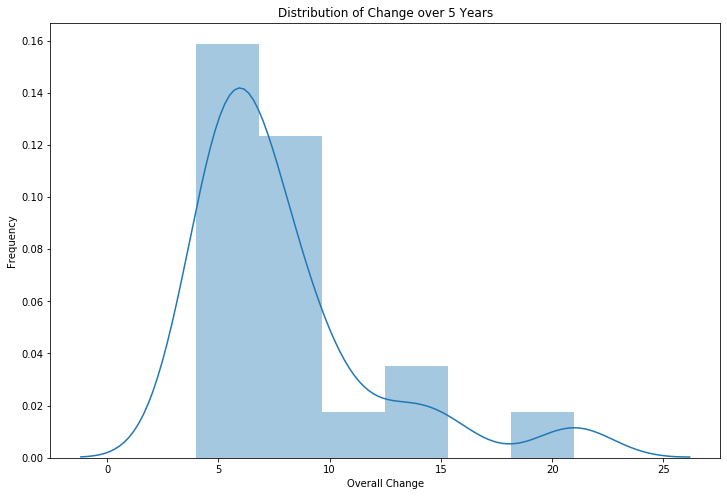

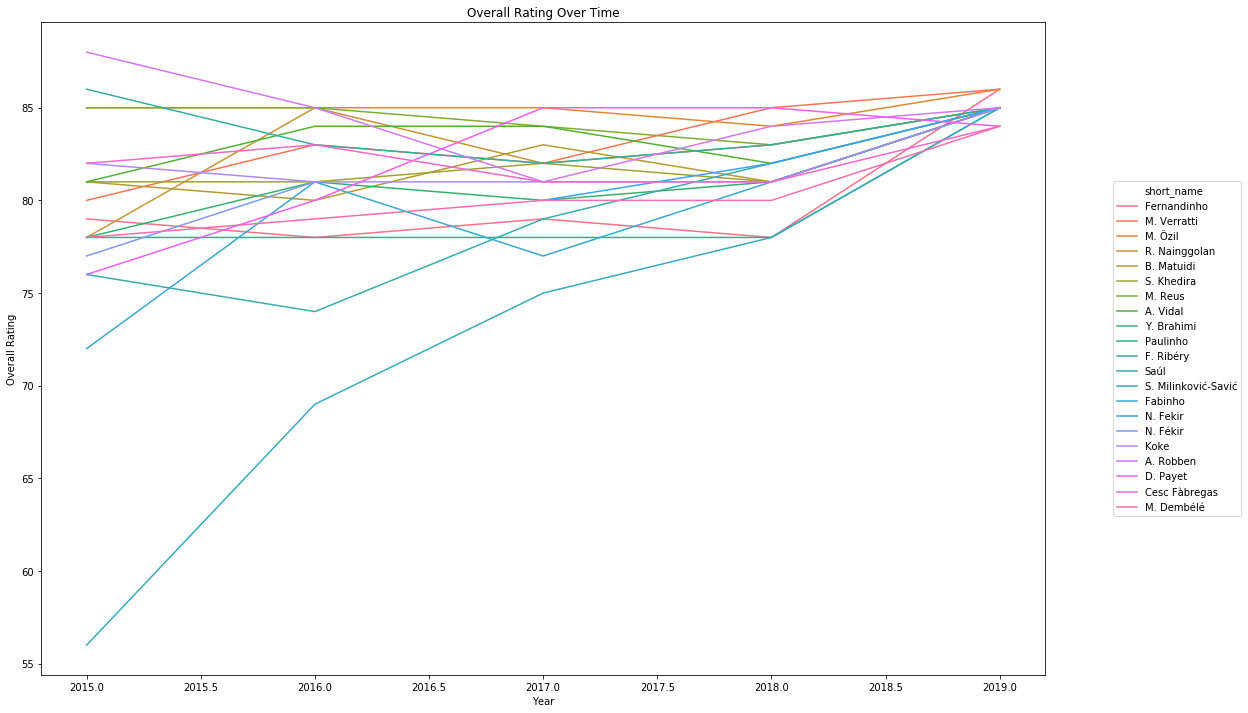

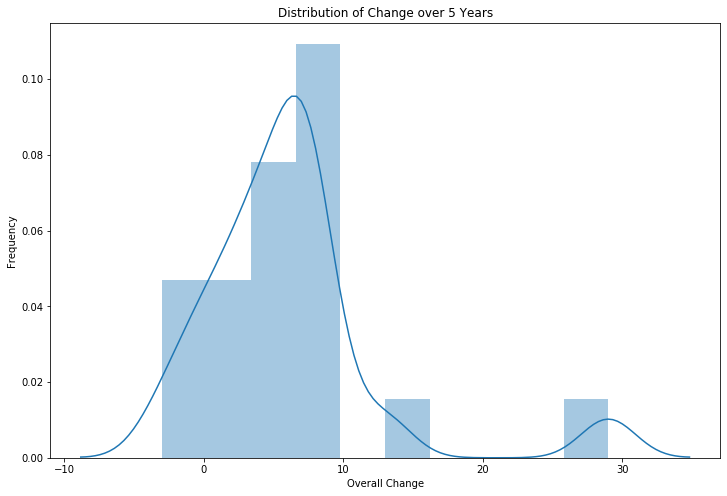

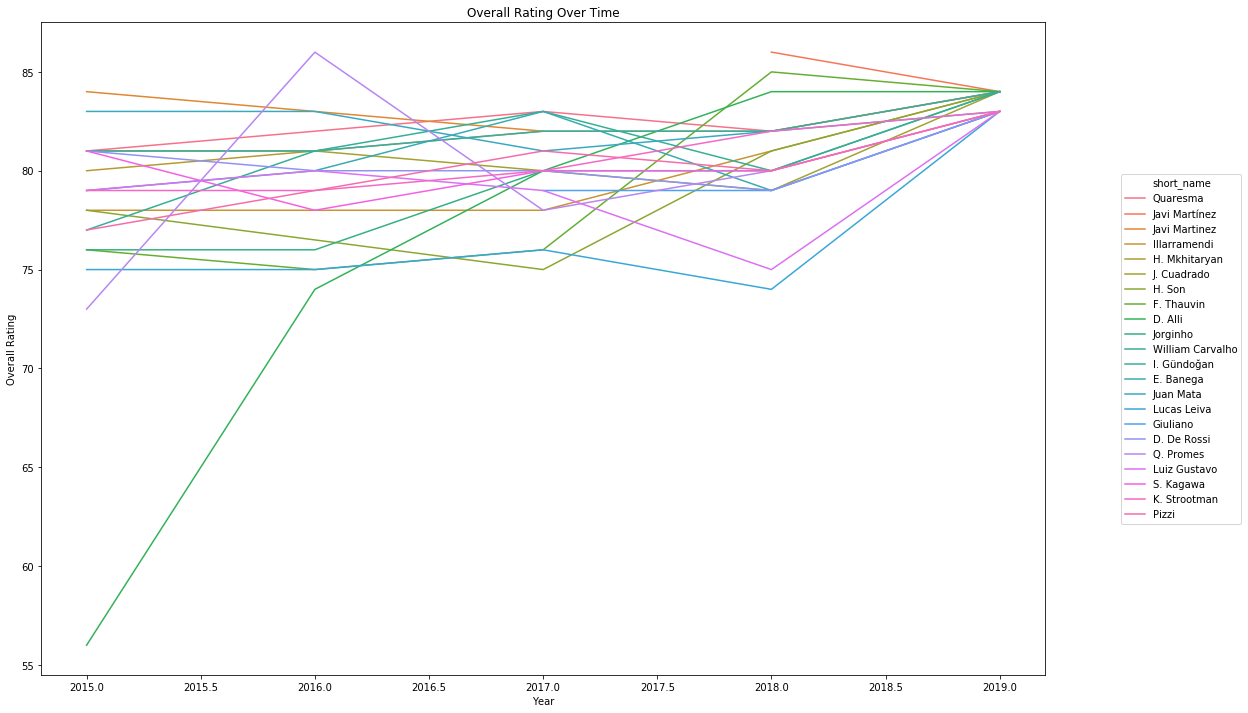

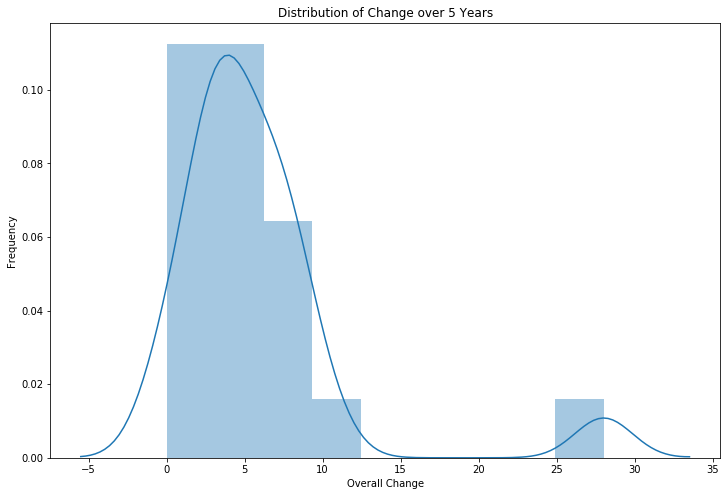

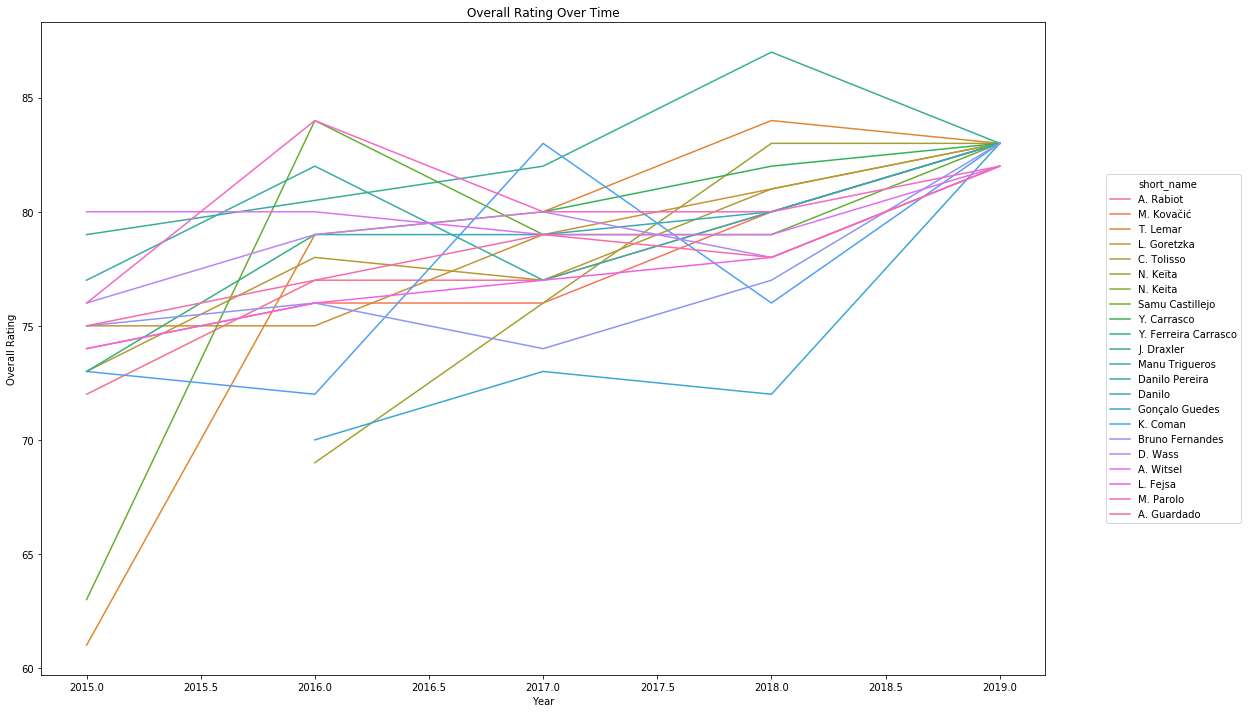

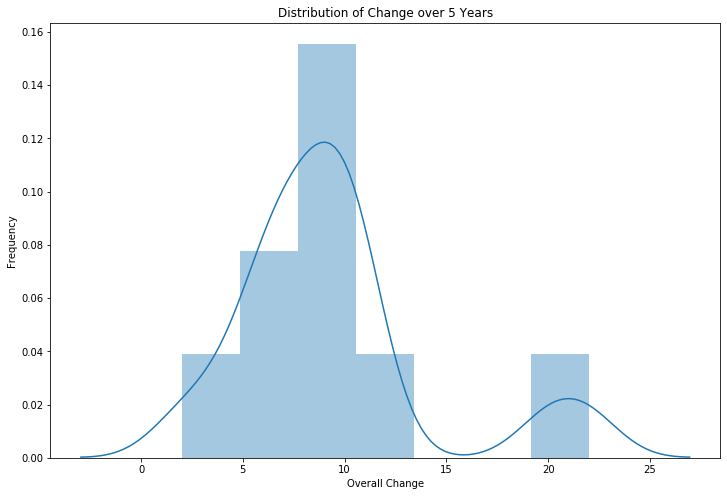

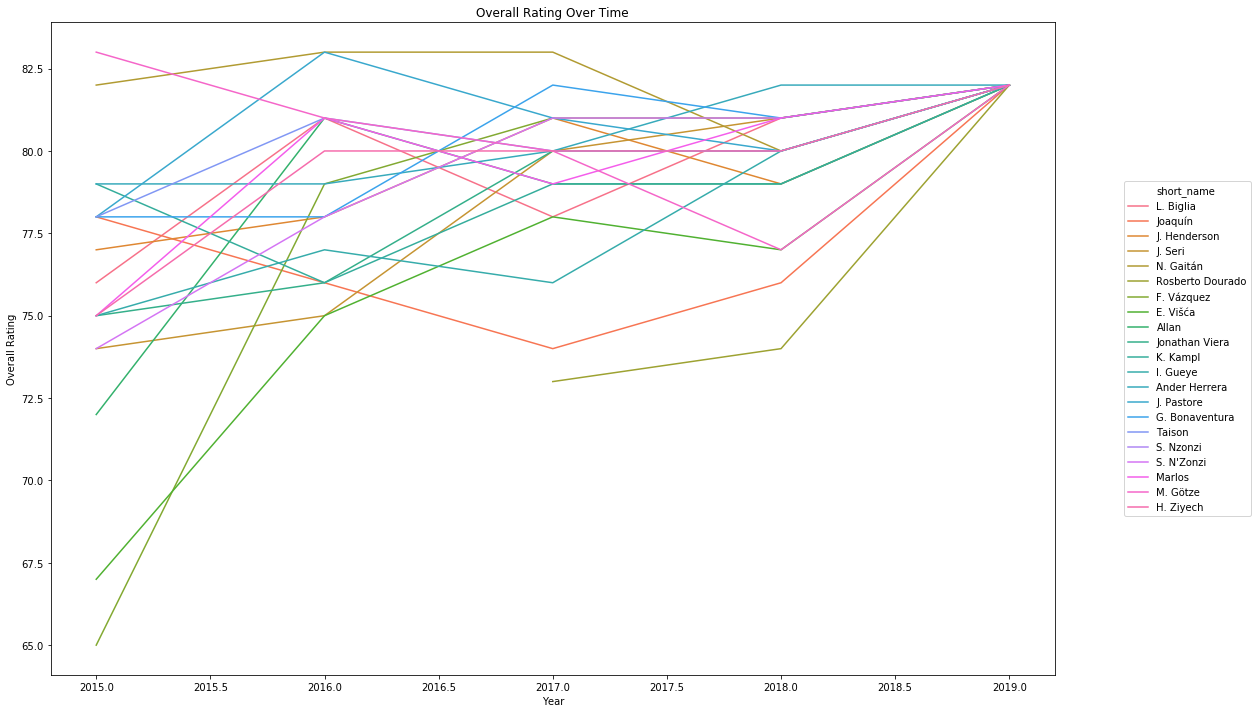

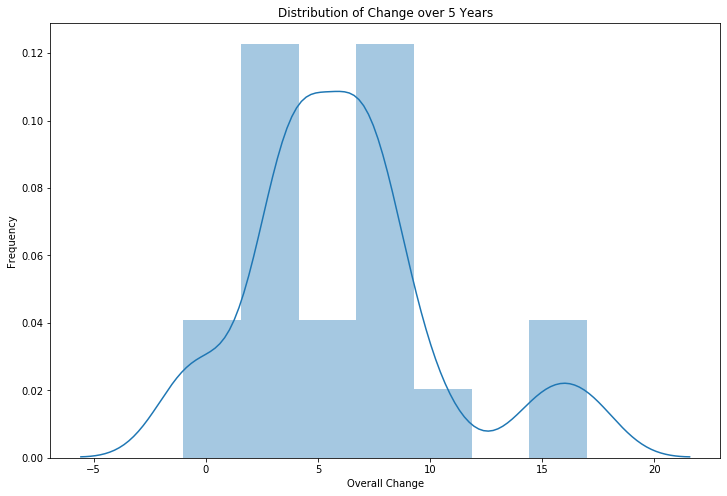

<Figure size 432x288 with 0 Axes>

In [15]:
a1 = midfielders[:99]
a2 = midfielders[99:198]
a3 = midfielders[198:300]
a4 = midfielders[300:393]
a5 = midfielders[393:]

alinegraph(a1)
adistgraph(a1)
alinegraph(a2)
adistgraph(a2)
alinegraph(a3)
adistgraph(a3)
alinegraph(a4)
adistgraph(a4)
alinegraph(a5)
adistgraph(a5)

Overall there is nothing too out of the ordinary. Most of these graphs have a very similar distribution and general trend in the lines. It is important to note that the graph with the most upward trend is the top 20% of midfield players, suggesting that the most elite midfielders may have a defining trait.

### Defenders Analysis

Defending is one of those positions that has really changed over the years. In the past defenders were tough and burly. Before every touch was a foul, defenders could almost barrel through their opponents. But the modern defender has to worry more about their decision making and positional awareness. This may be harder to quantify through a simple look at ratings and may require in-game statistics such as decision making under different scenarios. Because of this, I have zero predictions of what this graph could mean.

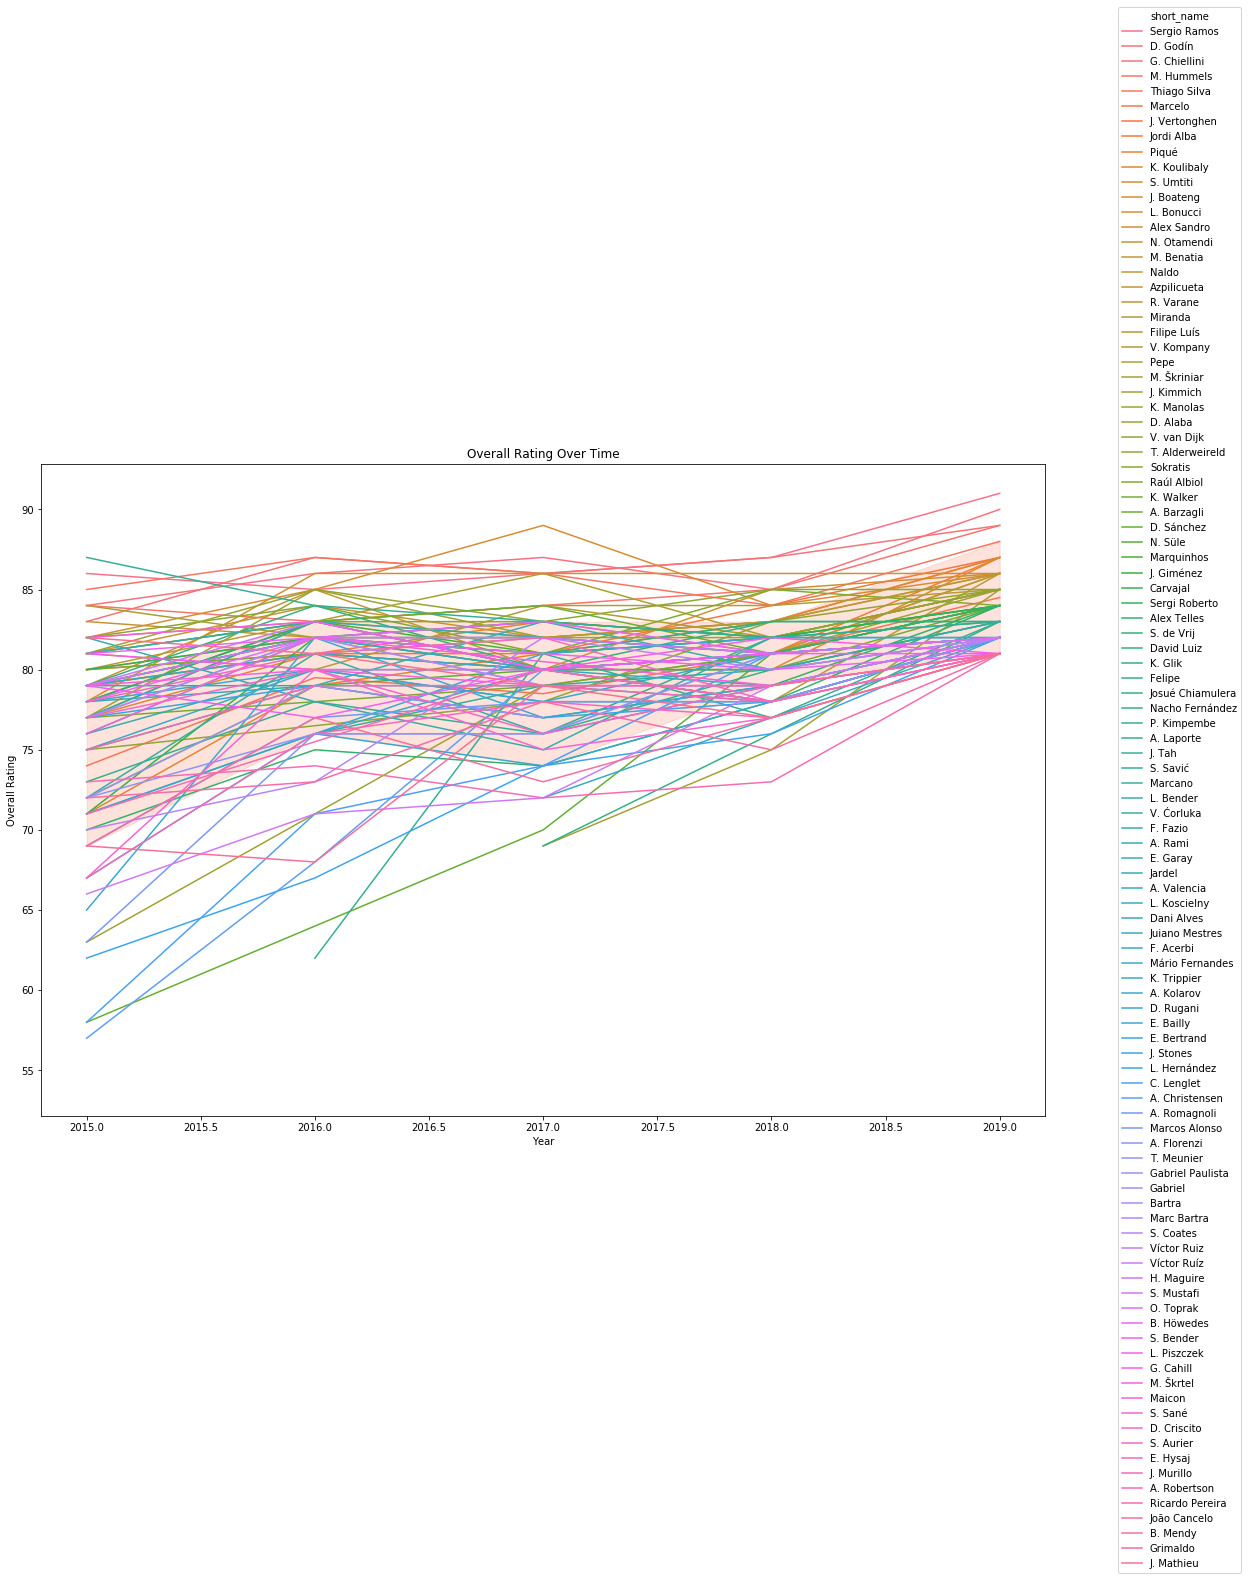

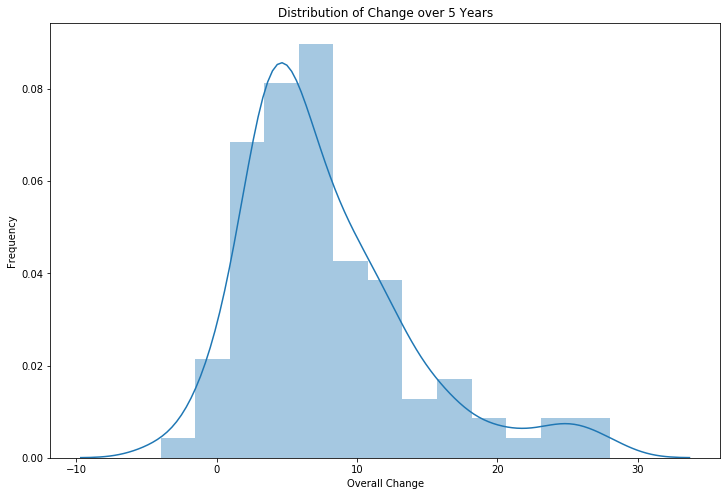

<Figure size 432x288 with 0 Axes>

In [16]:
defenders.overall = pd.to_numeric(defenders.overall)
alinegraph(defenders)
adistgraph(defenders)

The first thing that stands out is that in the distribution, the percentage of players that tend to increase 15 or more is a lot higher than in any of the other datasets. This should imply that it would be a lot easier to find a world-class defender and the chance of them improving a significant amount is very high. This is especially the case as we can see in the line graph that the range of the players is very small with less than a handful being able to distinguish themselves from the rest.

Taking a look at the fifth splits:

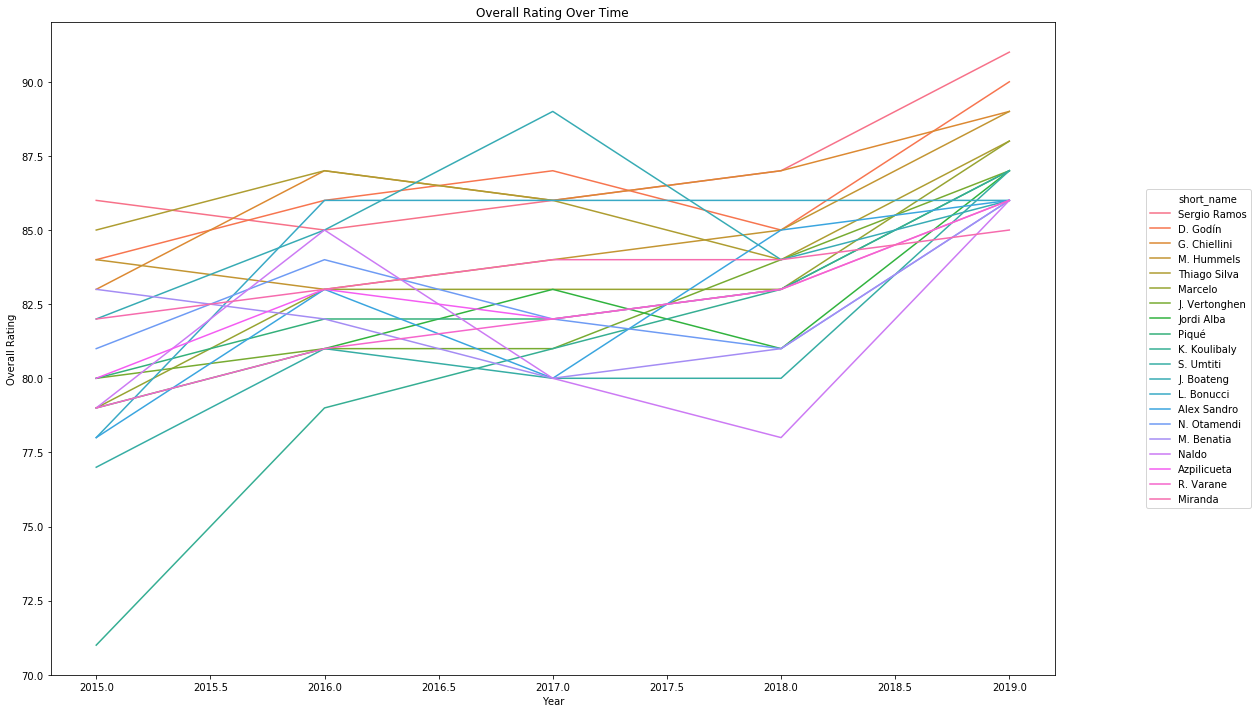

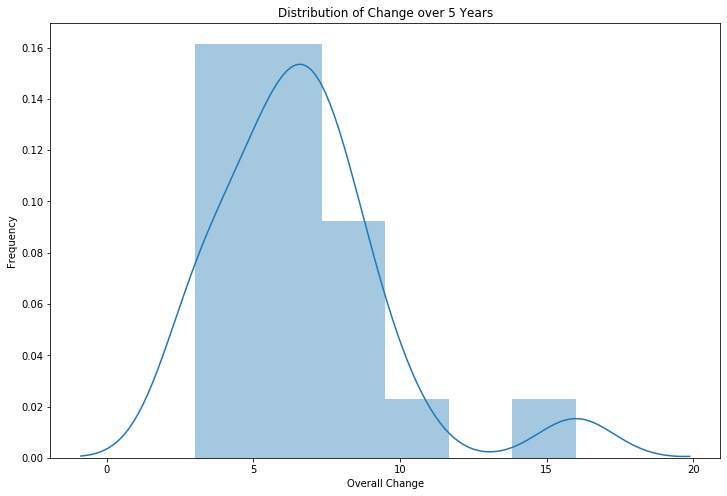

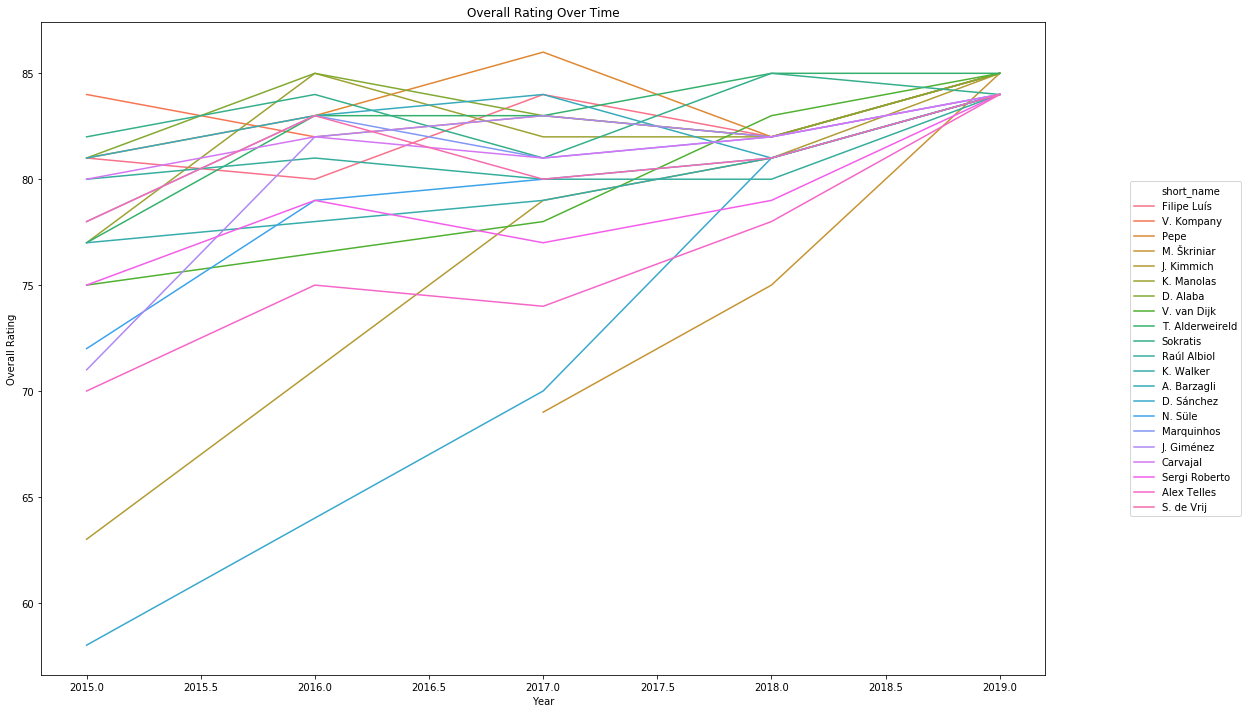

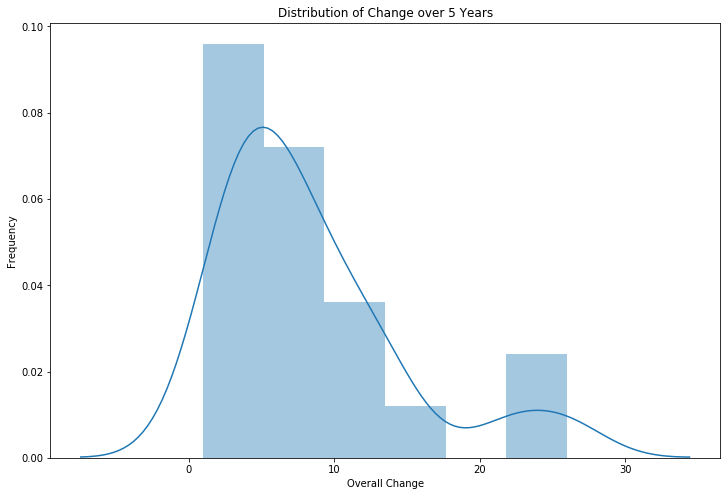

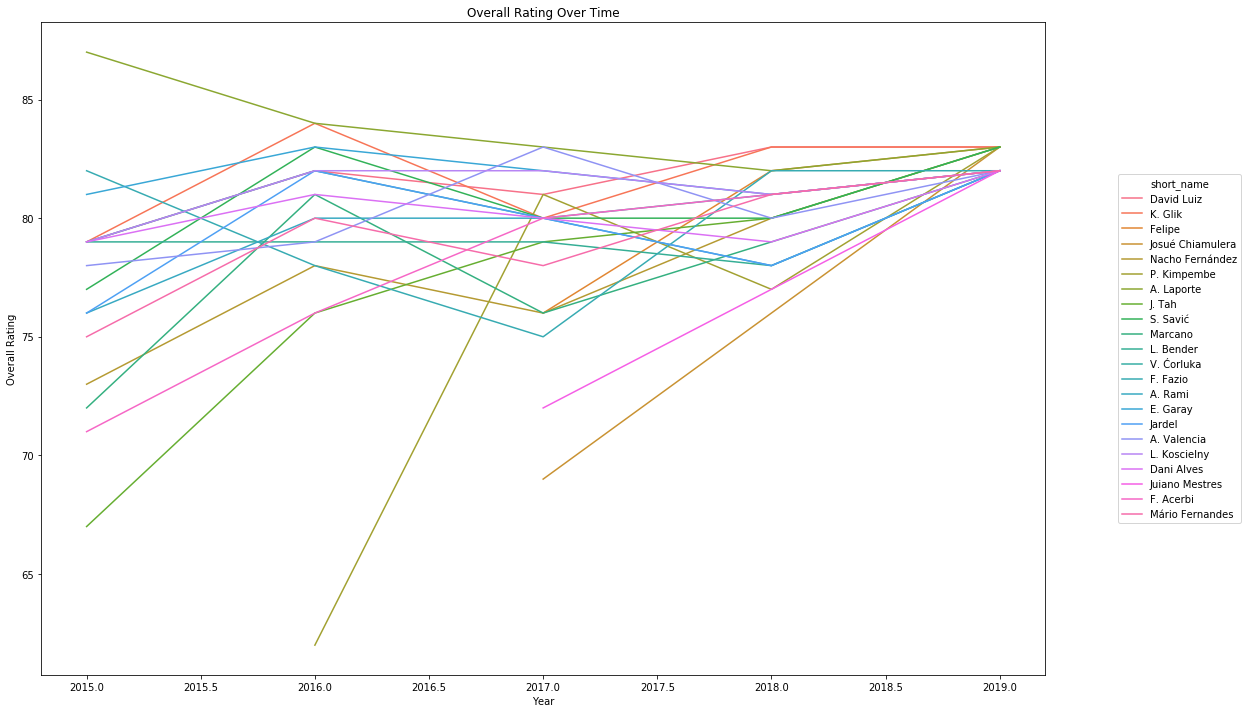

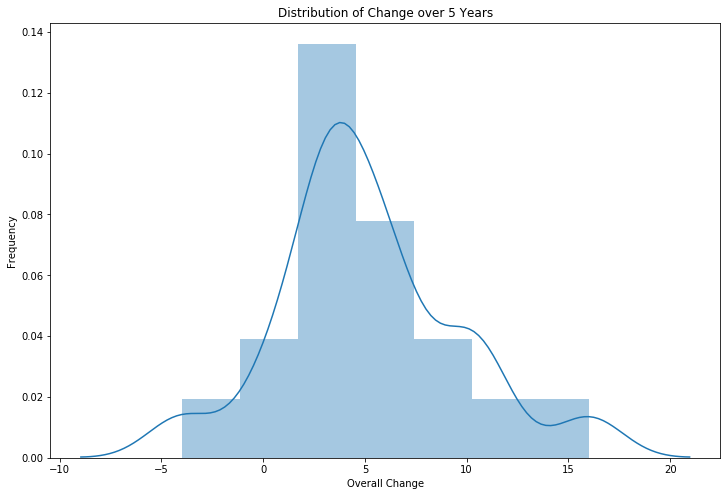

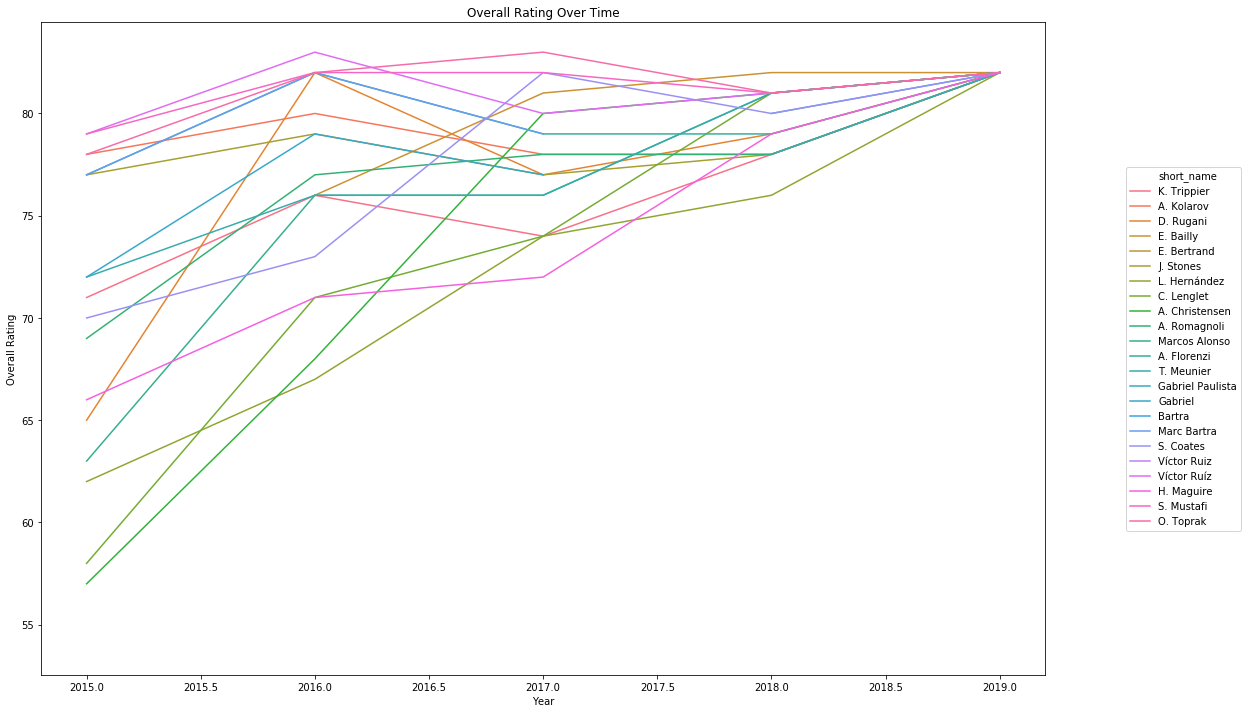

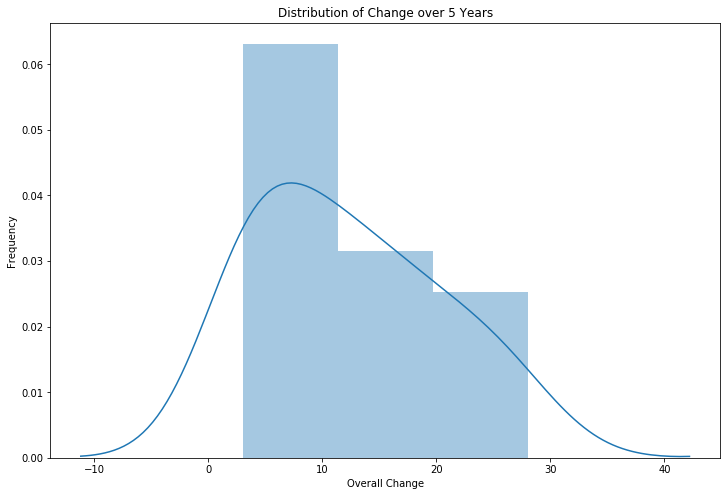

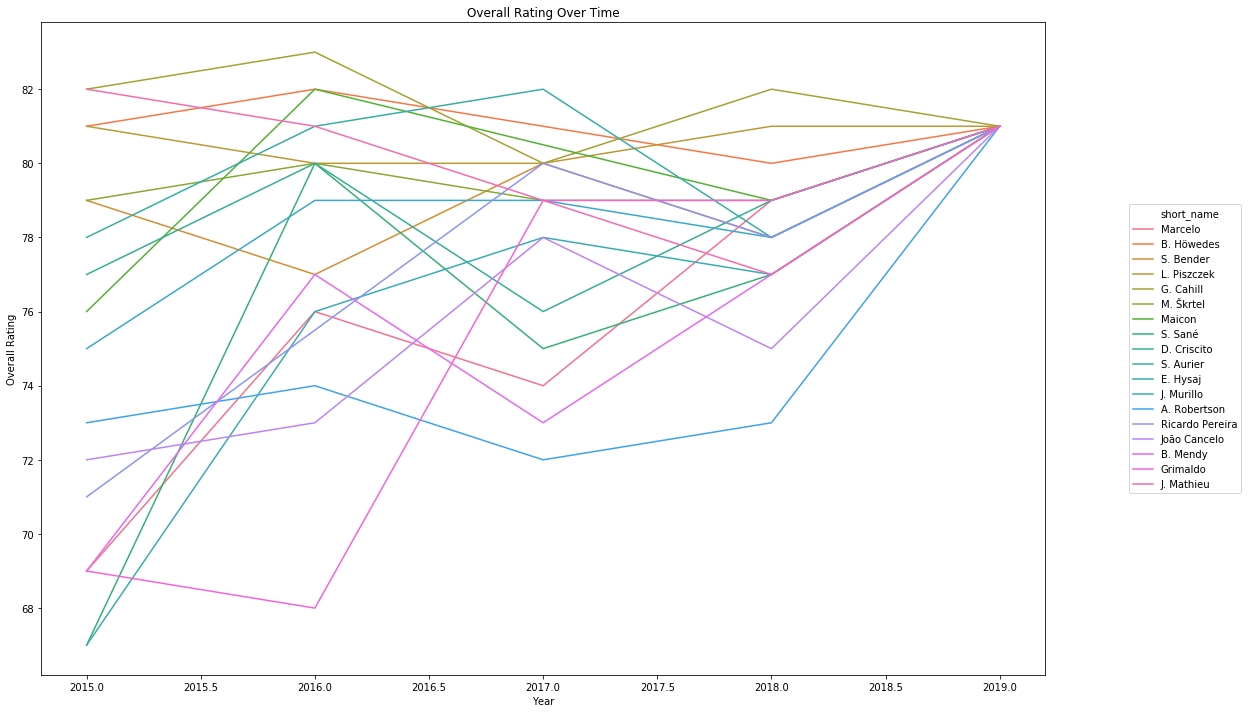

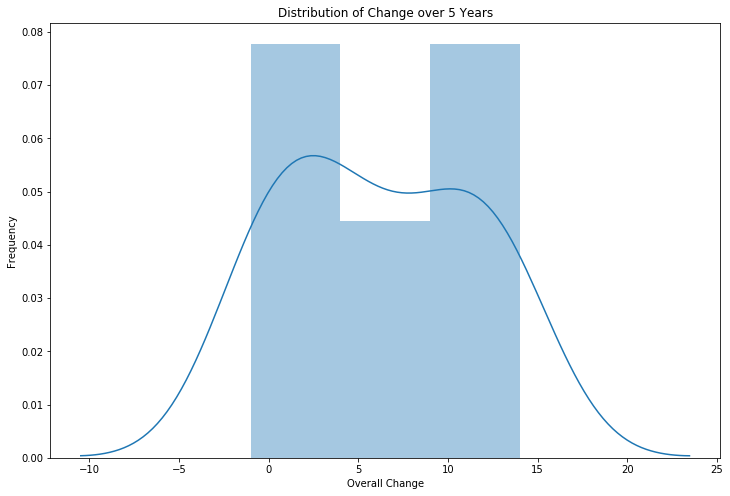

<Figure size 432x288 with 0 Axes>

In [17]:
a1 = defenders[:100]
a2 = defenders[100:201]
a3 = defenders[201:302]
a4 = defenders[302:397]
a5 = defenders[397:]

alinegraph(a1)
adistgraph(a1)
alinegraph(a2)
adistgraph(a2)
alinegraph(a3)
adistgraph(a3)
alinegraph(a4)
adistgraph(a4)
alinegraph(a5)
adistgraph(a5)

These are probably the most interesting fifth splits! Looking at the line graphs it can be seen that the rating of the players are almost distributed evenly among the splits besides the top 20%. Meaning the bottom 20% are all at about the same level, the next 20% are at the same level but slightly better and so on and so forth. It is also interesting to see that the starting ratings are all over the place for each fifth but then converge on one point. This backs up the earlier analysis of the defending positions having a higher probability to increase drastically compared to the other positions and this distribution appears to be uniform among all the fifths.

### Goalkeepers Analysis

Goalkeeping is the one position that gets a category to itself. It is the position with the longest longevity with goalkeepers playing well into their 40s but also has one of the clearest lines between an elite player and a mediocre player. There aren't many world-class goalkeepers which makes the ability to find one while they are young very very important. But it isn't over if a really good goalkeeper isn't found as they have a longer time to improve.

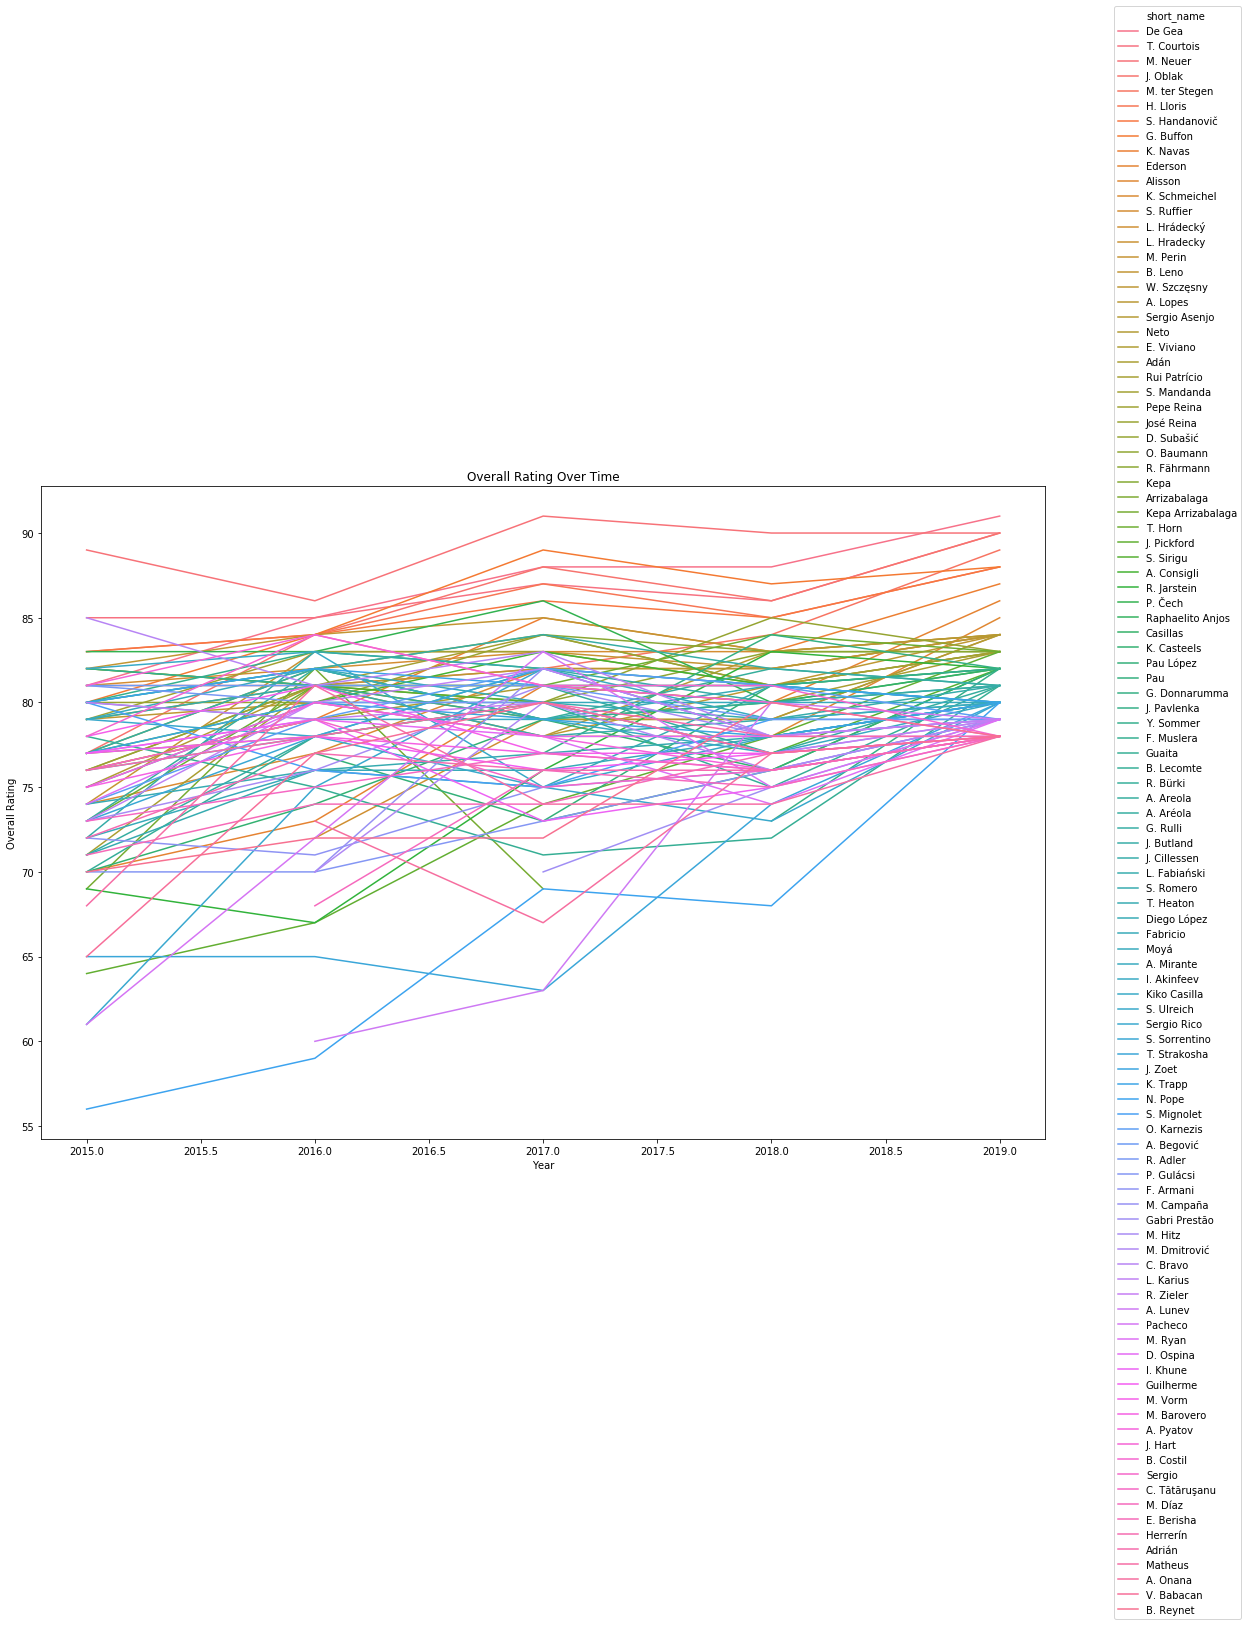

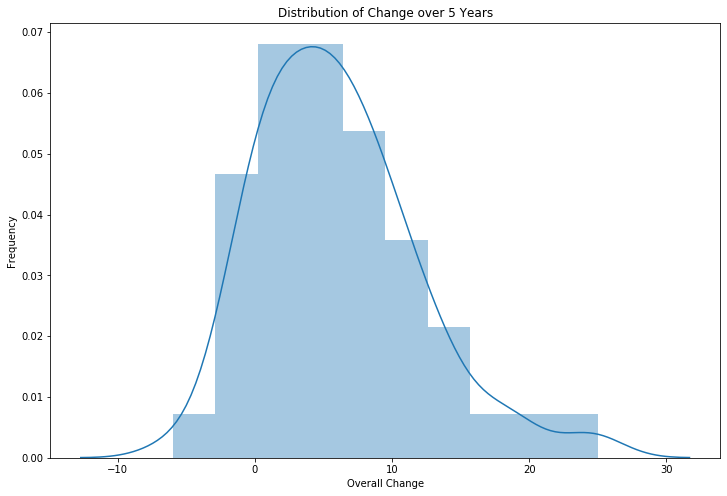

<Figure size 432x288 with 0 Axes>

In [18]:
goalkeepers.overall = pd.to_numeric(goalkeepers.overall)
alinegraph(goalkeepers)
adistgraph(goalkeepers)

Not as many players experience crazy growth as compared to defenders but a good portion still do. A good number see decent growth. But the range varies very greatly between the top 100 goalkeepers, more so than any other position.

Let's look at the fifth splits:

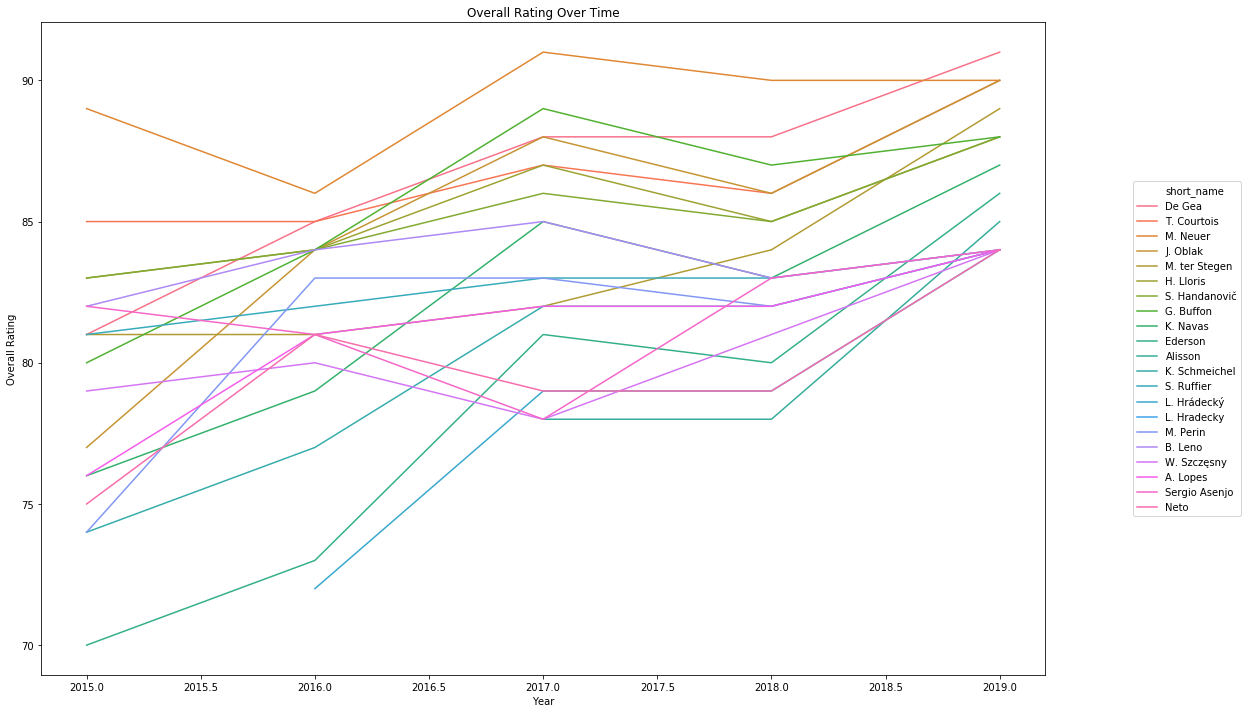

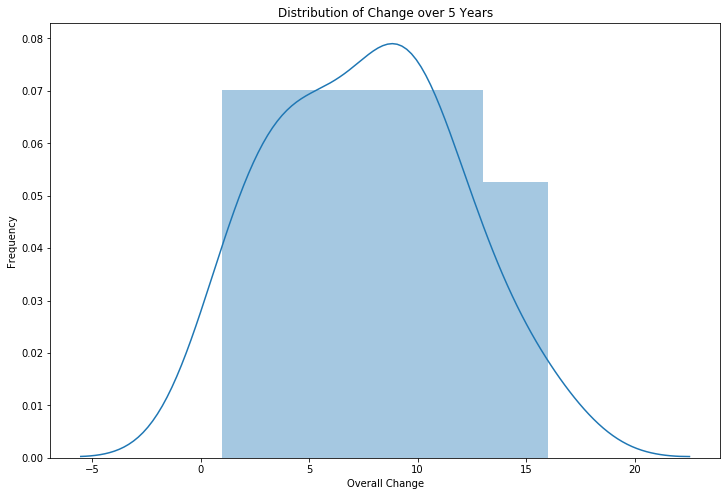

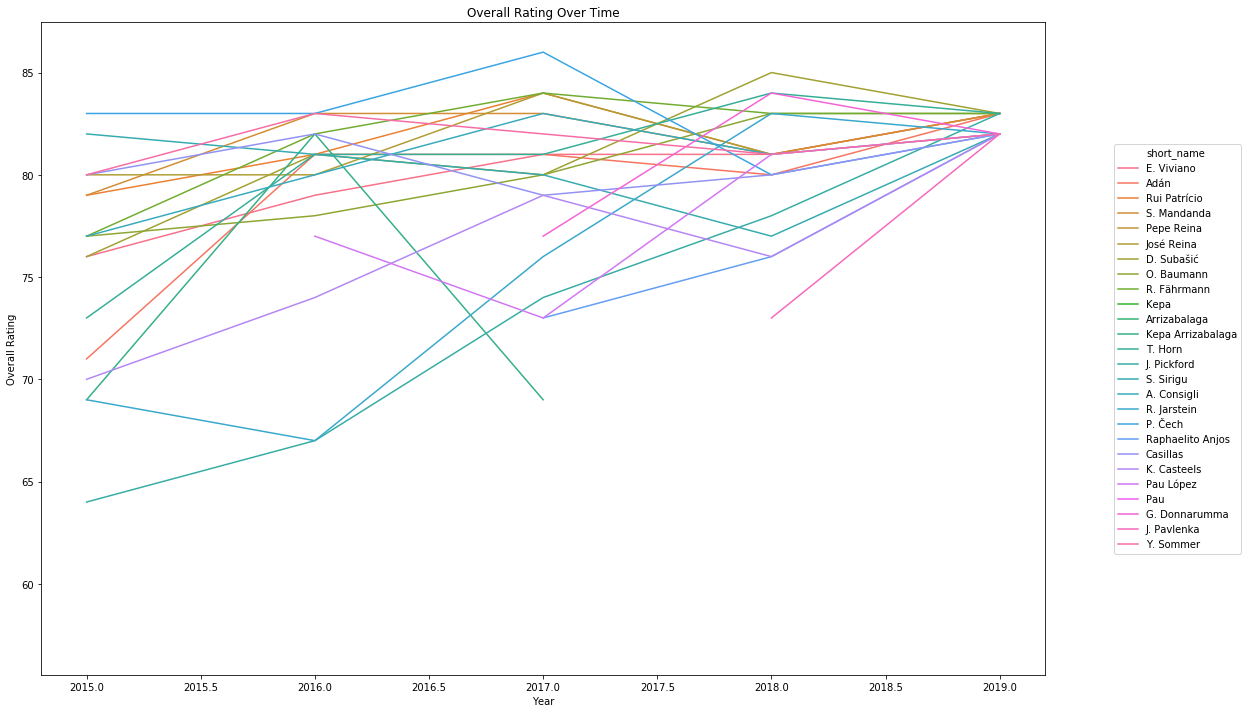

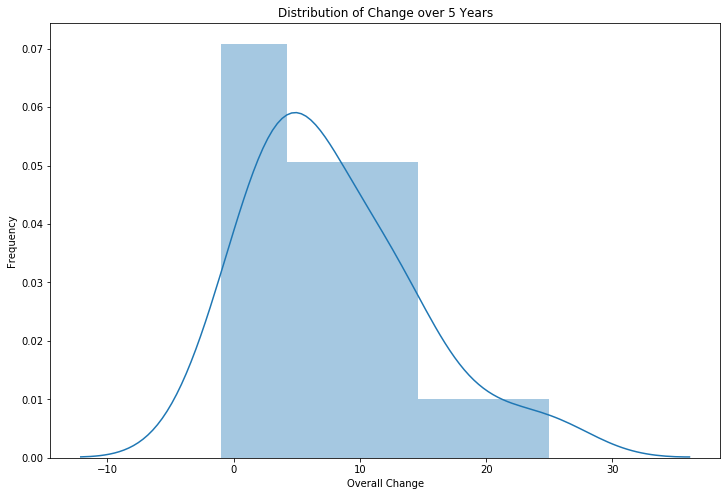

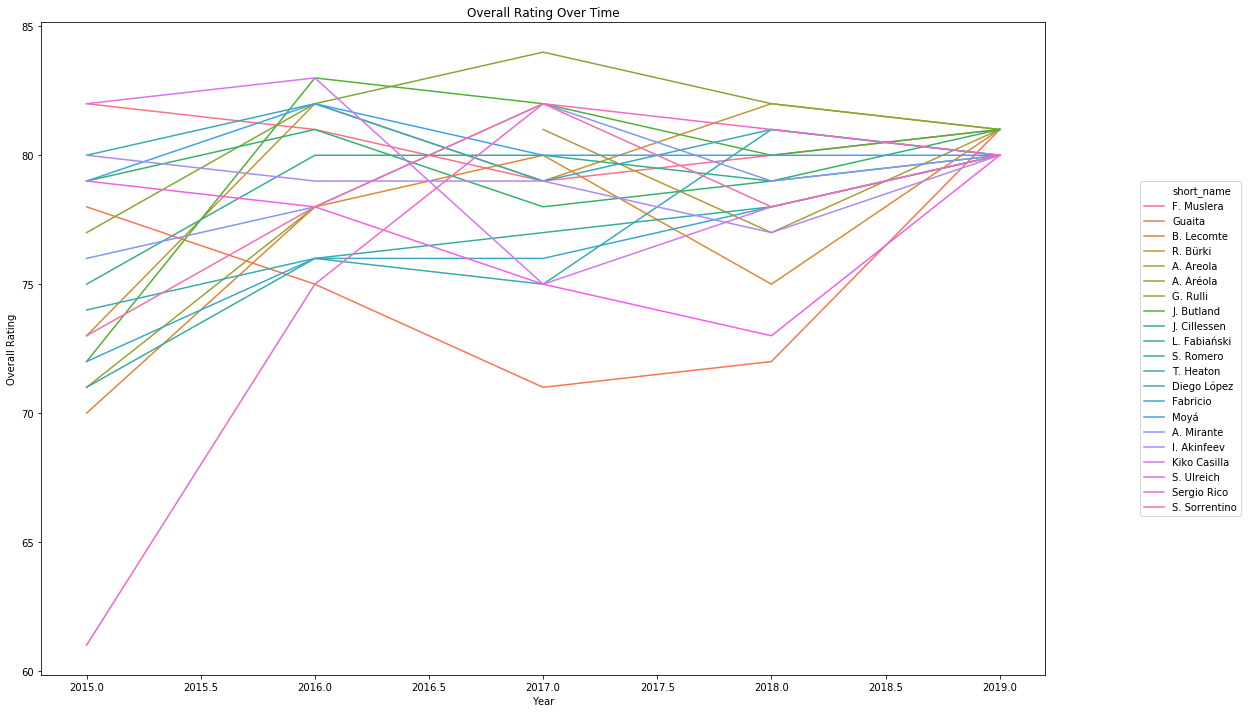

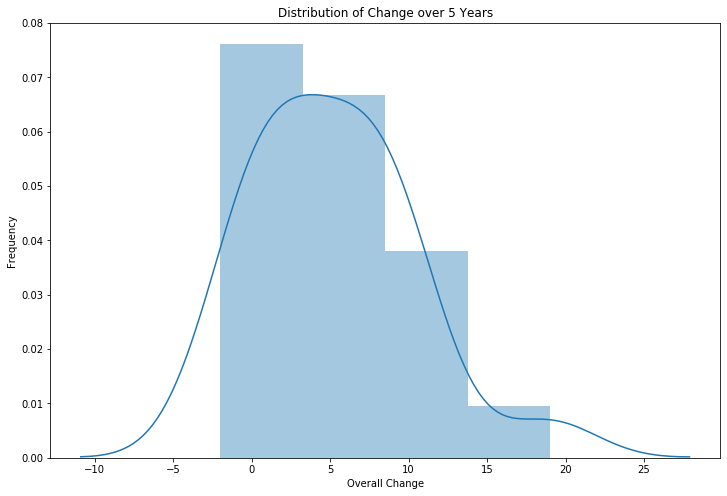

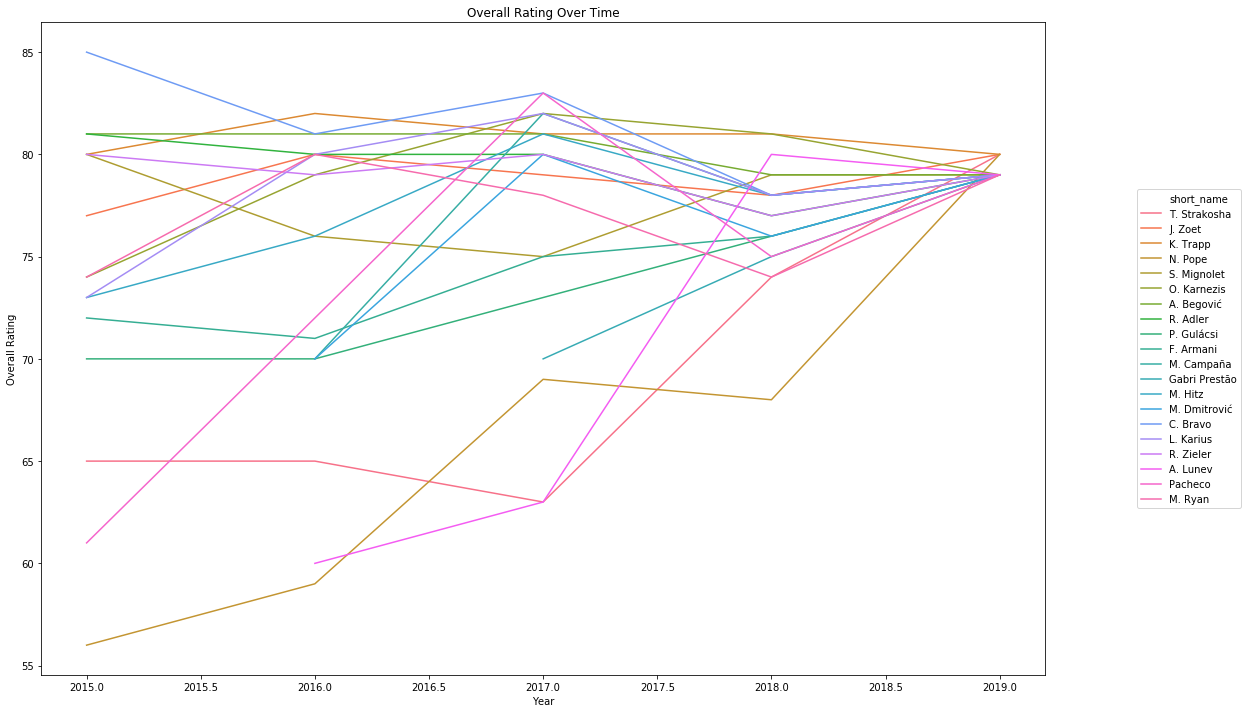

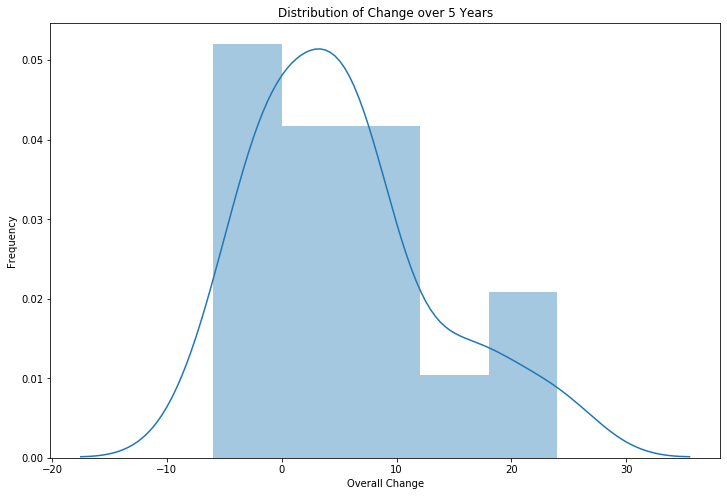

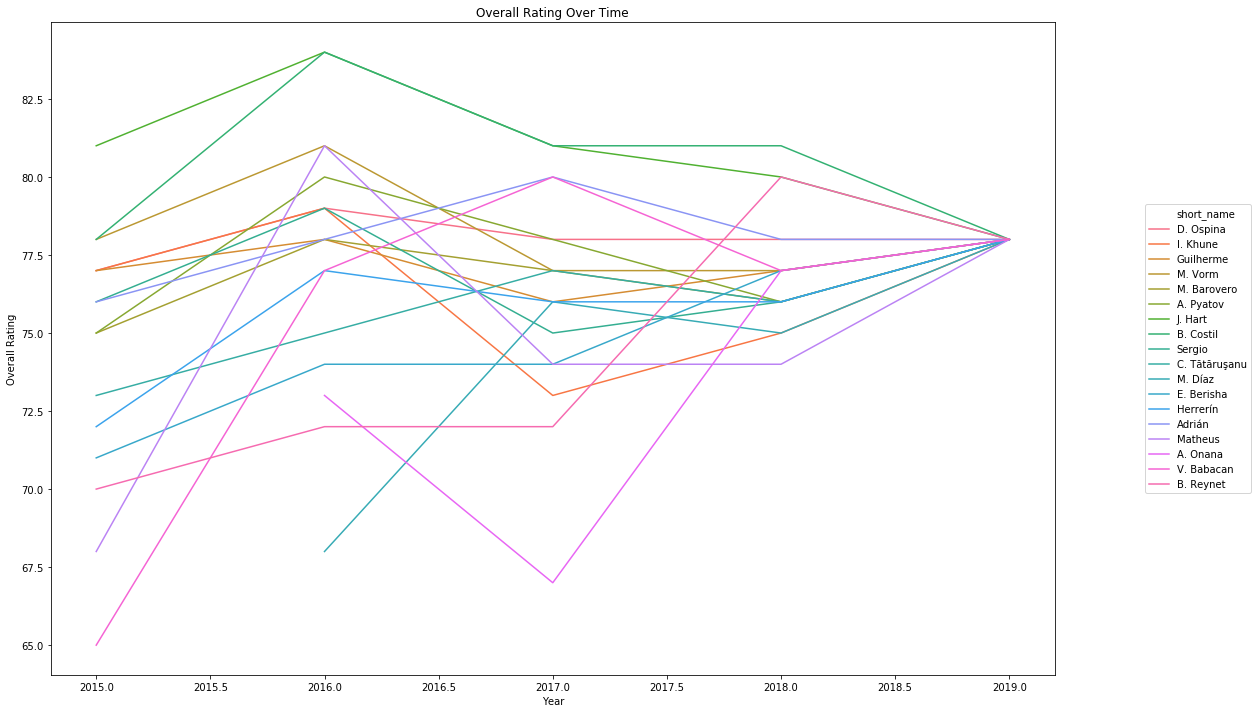

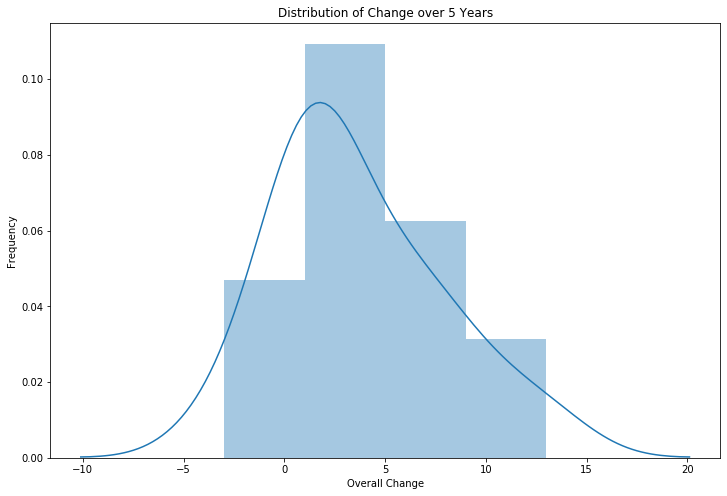

<Figure size 432x288 with 0 Axes>

In [19]:
a1 = goalkeepers[:98]
a2 = goalkeepers[98:201]
a3 = goalkeepers[201:301]
a4 = goalkeepers[301:396]
a5 = goalkeepers[396:]

alinegraph(a1)
adistgraph(a1)
alinegraph(a2)
adistgraph(a2)
alinegraph(a3)
adistgraph(a3)
alinegraph(a4)
adistgraph(a4)
alinegraph(a5)
adistgraph(a5)

My analysis of the goalkeeper position is very similar to that of the defenders as the line graphs and the distribution graphs are very similar. The most radical change does occur in between the bottom 20% to bottom 40% meaning that other caliber goalkeepers tend to not go through such drastic change

With these general trends in mind and a better understanding of how position can influence how overall rating should be viewed. We will now begin to build our data model.

## Building the Data Model

From our exploration of the data it would appear that there are no apparent trend to predicting growth. It doesn't appear to be something linear as players go through slumps or times of inspiration thus I've decided to create a model that is based off of a player's ability/potential to grow compared to other players rather than the average growth over time. This measurement will be called the "growth variable" for the rest of this tutorial.

The first thing we do is to define what we consider an elite player. Below is simple code that splits the top 100 players from each position into 5 different groups and shows at what overall rating the splits between the different level of footballers there are.

In [20]:
def BoundarySet(df):
    split = df.loc[df["year"] == 2019]["overall"]
    split = split.reset_index()
    data = ([["World-Class",split["overall"][19]],["Elite",split["overall"][39]],["Exceptional",split["overall"][59]],
             ["Great",split["overall"][79]],["Good",split["overall"][99]]])
    dfSplit = pd.DataFrame(data,columns = ["Level", "split"])
    return dfSplit
attSplit = BoundarySet(attackers)
midSplit = BoundarySet(midfielders)
defSplit = BoundarySet(defenders)
gkSplit = BoundarySet(goalkeepers)

In [21]:
attSplit

Level  split
0  World-Class     87
1        Elite     84
2  Exceptional     82
3        Great     81
4         Good     80

The above is simply the splits for the attacker position with each of these being the bottom line for what we are saying makes a world-class soccer player.

With these splits we can now calculate the overall

In [22]:
att_pos = ["ST", "LW", "RW", "CF"]
mid_pos = ["CAM", "CDM", "LM", "RM", "CM"]
def_pos = ["CB", "LB", "LWB", "RWB", "RB"]
gk_pos = ["GK"]

# Calculates the final overall rating of every player that matches the rating fed into the
# function and their position
def OvrYearChange(overall,pos,yearstart,yearend):
    sort = yearstart.loc[yearstart["overall"] == overall]
    final = []
    for i, row in sort.iterrows():
        sid = row["sofifa_id"]
        lookup = yearend.loc[yearend["sofifa_id"] == sid]
        if lookup.empty == False and list(yearend.loc[yearend["sofifa_id"] == sid]["player_positions"])[0] in pos:
            ovr = list(yearend.loc[yearend["sofifa_id"] == sid]["overall"])[0]
            final.append(ovr)
    return final

# Takes the values from the above function and splits it into the brackets we made to
# distinguish the players.
def valuation(aggregates,splits,ovr):
    first = second = third = fourth = fifth = other = 0
    addDict = {}
    avgIncr = 0
    maxIncr = 0
    minIncr = 100
    count = 0
    for x in aggregates:
        count += 1
        avgIncr = avgIncr + (x - ovr)
        if (x-ovr) > maxIncr:
            maxIncr = x-ovr
        if (x-ovr) < maxIncr:
            minIncr = x-ovr
        if x >= splits.loc[0]["split"]:
            first += 1
        elif x >= splits.loc[1]["split"]:
            second += 1
        elif x >= splits.loc[2]["split"]:
            second += 1
        elif x >= splits.loc[3]["split"]:
            second += 1
        elif x >= splits.loc[4]["split"]:
            second += 1
        else:
            other += 1
    total = first + second + third + fourth + fifth + other
    addDict["Overall"] = ovr
    if total != 0:
        addDict["Under"] = other/total
        addDict[splits.loc[0]["Level"]] = first/total
        addDict[splits.loc[1]["Level"]] = second/total
        addDict[splits.loc[2]["Level"]] = third/total
        addDict[splits.loc[3]["Level"]] = fourth/total
        addDict[splits.loc[4]["Level"]] = fifth/total
    else:
        addDict["Under"] = 0
        addDict[splits.loc[0]["Level"]] = 0
        addDict[splits.loc[1]["Level"]] = 0
        addDict[splits.loc[2]["Level"]] = 0
        addDict[splits.loc[3]["Level"]] = 0
        addDict[splits.loc[4]["Level"]] = 0
    if count != 0:
        addDict["Average Growth"] = avgIncr/count
    else:
        addDict["Average Growth"] = 0
    addDict["Maximum Growth"] = maxIncr
    addDict["Minimum Growth"] = minIncr
    return addDict

The following is an example of how the above code works. The following will aggregate all the overall rating statistics of attacking positions in a one year change.

In [23]:
FiveAttack = pd.DataFrame()
for i in range(55,attSplit.loc[4]["split"]):
    values = OvrYearChange(i,att_pos,fifa15,fifa16)
    values = values + OvrYearChange(i,att_pos,fifa16,fifa17)
    values = values + OvrYearChange(i,att_pos,fifa17,fifa18)
    values = values + OvrYearChange(i,att_pos,fifa18,fifa19)
    FiveAttack = FiveAttack.append(valuation(values,attSplit,i),ignore_index=True)

KeyboardInterrupt: 

In [ ]:
FiveAttack.head()

To go over the above table which isn't sorted as this isn't data that will be seen (we'll process data differently later).
- Overall - The Overall rating that was used to get the rest of the data
- Average Growth - the average growth of all players who started from the Overall rating over one year
- World-Class, Elite, Exceptional, Great, Good - are the tiers we set and the number represents the percentile of players that reach that status after one year
- Under - the tier that encompasses everything under the above tiers
- Maximum Growth, Minimum Growth - The Maximum and Minimum change in Overall rating over one year from this rating

Now with this we can move on and calculate our growth variable. Our growth variable will work based off of a normal distribution where we'll do:
- growth = (the change in rating - the average change)/Standard Deviation
- Standard Deviation being calculated with the assumption that the maximum is 3 SD away from the Average
After this we take the growth and multiply it by the difference in years it was calculated from. So for example if the growth was calculated from fifa15 to fifa16 then we multiply the growth by 1, if it was fifa15 to fifa17 then two. Finally we divide the overall growth by the total number of years that were taken into account. This works similar to how schools calculate GPA with credits from class. This places more importance on long-term predictions working rather than short-term because our goal is to predict long-term growth as well as take into account slumps that occur.

In [ ]:
listofyears = [fifa15,fifa16,fifa17,fifa18,fifa19]
def growthCalculator(sid, years, pos, splits):
    firstYear = None;
    lastYear = None;
    credit = 0
    growth = 0
    addDict = {}
    for x in range(0,len(years)):
        if not (years[x].loc[years[x]["sofifa_id"] == sid]).empty:
            firstYear = x
            break;
    for y in range(0,len(years)):
        if not (years[y].loc[years[y]["sofifa_id"] == sid]).empty:
            lastYear = y
    for i in range(firstYear,lastYear):
        for j in range(i+1,lastYear+1):
            diff = j-i
            if(years[i].loc[years[i]["sofifa_id"] == sid]).empty:
                continue
            startOvr = list(years[i].loc[years[i]["sofifa_id"] == sid]["overall"])[0]
            if(years[j].loc[years[j]["sofifa_id"] == sid]).empty:
                continue
            endOvr = list(years[j].loc[years[j]["sofifa_id"] == sid]["overall"])[0]
            diffOvr = endOvr - startOvr
            value = OvrYearChange(startOvr,pos,years[i],years[j])
            fullDB = valuation(value,splits,startOvr)
            SD = (fullDB["Maximum Growth"]-fullDB["Average Growth"])/3
            if SD == 0:
                SD = 1
            growth = (diffOvr-fullDB["Average Growth"])/SD*diff
            credit += diff
    addDict["SId"] = sid
    addDict["Name"] = list(years[lastYear].loc[years[lastYear]["sofifa_id"] == sid]["short_name"])[0]
    addDict["Overall"] = list(years[lastYear].loc[years[lastYear]["sofifa_id"] == sid]["overall"])[0]
    if credit != 0:
        addDict["Growth"] = growth/credit
    else:
        addDict["Growth"] = 0
    addDict["First Year"] = firstYear + 2015
    addDict["Last Year"] = lastYear + 2015
    addDict["Credits"] = credit
    return addDict

Now that we have created our growth variable calculator. We will show an example of creating a growth database. We won't create one until a little later as this takes a really long time to calculate (I attempted the entire Fifa19 database earlier and after one hour, was not done yet). This simply shows the top 20 players in the growth database and what the growth database looks like.

In [ ]:
growthDatabase = pd.DataFrame()

for i in range(0,20):
    x = unique_players[i]
    pos = list(fifa19.loc[fifa19["sofifa_id"] == x]["player_positions"])[0]
    if pos in att_pos:
        growth_calc = growthCalculator(x,listofyears,att_pos, attSplit)
        growth_calc["Position"] = "Attacker"
    elif pos in def_pos:
        growth_calc = growthCalculator(x,listofyears,def_pos, defSplit)
        growth_calc["Position"] = "Defender"
    elif pos in mid_pos:
        growth_calc = growthCalculator(x,listofyears,mid_pos, midSplit)
        growth_calc["Position"] = "Midfielder"
    elif pos in gk_pos:
        growth_calc = growthCalculator(x,listofyears,gk_pos, gkSplit)
        growth_calc["Position"] = "Goalkeeper"
    else:
        growth_calc = {}
    growthDatabase = growthDatabase.append(growth_calc,ignore_index=True)
    
growthDatabase

Now that we have our growth database of every player we also need our database of growth based on rating. The following simply aggregates the growth based on rating for every position and between every year.

In [ ]:
OvrChangeDB = pd.DataFrame()

def removeextra(add):
    add.pop("World-Class")
    add.pop("Exceptional")
    add.pop("Elite")
    add.pop("Good")
    add.pop("Great")
    add.pop("Under")
    return add
def OverChange(pos,split,position,OvrChangeDB):
    for i in range(55,90):
        # One year Changes
        values = OvrYearChange(i,pos,fifa15,fifa16)
        values = values + OvrYearChange(i,pos,fifa16,fifa17)
        values = values + OvrYearChange(i,pos,fifa17,fifa18)
        values = values + OvrYearChange(i,pos,fifa18,fifa19)
        add = valuation(values,split,i)
        add["Position"] = position
        add["Difference in Years"] = 1
        add = removeextra(add)
        OvrChangeDB = OvrChangeDB.append(add,ignore_index=True)
        #Two year splits
        values = OvrYearChange(i,pos,fifa15,fifa17)
        values = values + OvrYearChange(i,pos,fifa16,fifa18)
        values = values + OvrYearChange(i,pos,fifa17,fifa19)
        add = valuation(values,split,i)
        add["Position"] = position
        add["Difference in Years"] = 2
        add = removeextra(add)
        OvrChangeDB = OvrChangeDB.append(add,ignore_index=True)
        #Three year splits
        values = OvrYearChange(i,pos,fifa15,fifa18)
        values = values + OvrYearChange(i,pos,fifa16,fifa19)
        add = valuation(values,split,i)
        add["Position"] = position
        add["Difference in Years"] = 3
        add = removeextra(add)
        OvrChangeDB = OvrChangeDB.append(add,ignore_index=True)
        #Four year splits
        values = OvrYearChange(i,pos,fifa15,fifa19)
        add = valuation(values,split,i)
        add["Position"] = position
        add["Difference in Years"] = 4
        add = removeextra(add)
        OvrChangeDB = OvrChangeDB.append(add,ignore_index=True)
    return OvrChangeDB

att1 = OverChange(att_pos,attSplit,"Attacker",OvrChangeDB)
def1 = OverChange(def_pos,attSplit,"Defender",OvrChangeDB)
mid1 = OverChange(mid_pos,attSplit,"Midfielder",OvrChangeDB)
gk1 = OverChange(gk_pos,attSplit,"Goalkeeper",OvrChangeDB)

In [ ]:
OvrChangeDB = pd.concat([att1,def1,mid1,gk1])
OvrChangeDB

## Assessing the Validity of the Model

In case it wasn't clear before. We simply created a growth variable that was based off of the player's change in overall rating compared to the normal distribution of change for similarly rated players.

Now to assess how accurate our model is. To do this we will take the top 100 young players of 2019 and based on their growth variable and the average change in rating for their position and 2019 rating, we will predict where they will be rated in 2020. We will compare this with FIFA's actual 2020 data to see how accurate we are.

The first step as stated before is to create our growth database. The code below is simply a rehashing of the one shown previously except with a few extra parameters inputted to only select players 21 or under (a common age in soccer to count as young).

In [24]:
growthDatabase = pd.DataFrame()
count = 0
search = 0
while count < 100:
    x = unique_players[search]
    pos = list(fifa19.loc[fifa19["sofifa_id"] == x]["player_positions"])[0]
    age = list(fifa19.loc[fifa19["sofifa_id"] == x]["age"])[0]
    if age <= 21:
        count += 1
        if pos in att_pos:
            growth_calc = growthCalculator(x,listofyears,att_pos, attSplit)
            growth_calc["Position"] = "Attacker"
        elif pos in def_pos:
            growth_calc = growthCalculator(x,listofyears,def_pos, defSplit)
            growth_calc["Position"] = "Defender"
        elif pos in mid_pos:
            growth_calc = growthCalculator(x,listofyears,mid_pos, midSplit)
            growth_calc["Position"] = "Midfielder"
        elif pos in gk_pos:
            growth_calc = growthCalculator(x,listofyears,gk_pos, gkSplit)
            growth_calc["Position"] = "Goalkeeper"
        else:
            growth_calc = {}
        growthDatabase = growthDatabase.append(growth_calc,ignore_index=True)
    search += 1
    
growthDatabase

NameError: name 'growthCalculator' is not defined

Now with this data we will calculate the predicted score below by multiplying the 2019 rating with the growth change for someone of that position over the course of one year.

In [ ]:
predicted = pd.DataFrame()

for i,rows in growthDatabase.iterrows():
    addDict = {}
    growthVar = rows["Growth"]
    oldRating = rows["Overall"]
    pos = rows["Position"]
    first = OvrChangeDB.loc[OvrChangeDB["Overall"] == oldRating]
    second = first.loc[first["Position"] == pos]
    final = second.loc[second["Difference in Years"] == 1]
    SD = list((final["Maximum Growth"]-final["Average Growth"])/3)[0]
    newRating = growthVar * SD + list(final["Average Growth"])[0] + oldRating
    addDict["SId"] = rows["SId"]
    addDict["Name"] = rows["Name"]
    addDict["Growth Variable"] = growthVar
    addDict["Predicted Rating"] = newRating
    actual = list(fifa20.loc[fifa20["sofifa_id"] == rows["SId"]]["overall"])
    if len(actual) > 0:
        addDict["Actual Rating"] = list(fifa20.loc[fifa20["sofifa_id"] == rows["SId"]]["overall"])[0]
    else:
        addDict["Actual Rating"] = newRating
    predicted = predicted.append(addDict,ignore_index=True)
predicted

This is our final model of predicted ratings and we will now put it into a visual display to see how accurate it is.

In [ ]:
scatter = sns.regplot(x = 'Predicted Rating', y = 'Actual Rating', data = predicted)

# Resizing the graph to look nicer
coord = scatter.get_position()
# Setting the title and axis
scatter.set_title("Predicted vs. Actual")
scatter.set(xlim=(72,90),ylim=(72,90))
scatter.set_position([coord.x0, coord.y0, coord.width * 3, coord.height * 3])
scatter.set(ylabel = "Actual Rating", xlabel = "Predicted Rating")
# Displaying the graph
scatter

The trend is upwards but the data is all over the place. Ideally, if the model was perfect it would be a one-to-one linear line. But from this graph it appears that the predicted ratings were a lot lower than the actual ratings overall. The distribution doesn't show any particular skew meaning that our model probably didn't introduce any huge intential biases.

Taking a look at the actual linear regression:

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

x = predicted["Predicted Rating"]
X = x[:, np.newaxis] #Scikit-learn Linear Regression only takes 2D arrays as input
Y = predicted["Actual Rating"]
reg = LinearRegression()
reg.fit(X,Y)

Int = reg.intercept_
Coef = reg.coef_[0]
print("Y-Intercept:", Int)
print("Coefficient:", Coef)

As stated before the coefficient would ideally be 1 and the Y-Intercept would be 0. Of course this wasn't the case. I am glad that the coefficient was higher than I thought it would be but this does show that our model isn't a great fit in the end.

## Conclusion

Although sadly, the model we created didn't work out too well, I don't think the steps we took as well as the logic behind these steps played out badly. We created a very simple model to predict the growth of youth players and was able to accurately predict some to a few ratings. If done again, there are more variables to take into account such as age, older players are declining in skill which affects our model as our model predicts younger player trends. Another thing to take into account is that FIFA does adjust their ratings and rankings a bit arbitrarily so it is hard to use this data to justify any one position.

Overall with this tutorial we were able to gather data from 6 different years of footballing (or soccer-ing), process that data and create our very own model to try to model and predict the growth of future world-class footballers. Our model wasn't anywhere near perfect but was a step in the right direction. I hope you all enjoyed going through this tutorial. Let me know if you have any questions and I hope you have learned a bit more about soccer/football and how data science can be the solution to one of the most complicated games in history.